In [27]:
from master_thesis.src import utils
import matplotlib.pyplot as plt
import scipy.stats as st
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', 80) # make all columns visible

In [28]:
full = utils.get_raw_df()
full.set_index('articleId', inplace=True)

Shape of raw df: (84887, 71)


In [29]:
full.columns

Index(['pageviews', 'entrances', 'exits', 'bounces', 'timeOnPage',
       'conversions', 'avgTimeOnPage', 'stickiness', 'entranceRate',
       'bounceRate', 'sharePageviews', 'n', 'nObs', 'score_pageviews',
       'score_avgTimeOnPage', 'score_entranceRate', 'score_stickiness',
       'SCORE', 'kategorie', 'rubrik', 'subRubrik', 'titel', 'pagePath',
       'dpaGuid', 'zeilen', 'prozentDpa', 'prozentVerlag', 'categoryCode',
       'creationDate', 'flextags', 'genre', 'geoArea', 'importance',
       'keywords', 'lifetime', 'limbic', 'links', 'picture', 'service',
       'subject', 'subjectBroader', 'subjectCode', 'teaser', 'text', 'titelH1',
       'titelH3', 'urgency', 'wikidata', 'wordcount', 'category', 'ratgeber',
       'format', 'dateLoaded', 'nLoadAttempts', 'ausreisser', 'publisher',
       'city', 'text_preprocessed', 'nr_tokens', 'mean_token_length',
       'nr_tokens_teaser', 'nr_tokens_titelH1', 'nr_char', 'nr_sentences',
       'mean_sentence_length', 'avgTimeOnPagePerWordco

In [30]:
full.head(5)

,pageviews,entrances,exits,bounces,timeOnPage,conversions,avgTimeOnPage,stickiness,entranceRate,bounceRate,sharePageviews,n,nObs,score_pageviews,score_avgTimeOnPage,score_entranceRate,score_stickiness,SCORE,kategorie,rubrik,subRubrik,titel,pagePath,dpaGuid,zeilen,prozentDpa,prozentVerlag,categoryCode,creationDate,flextags,genre,geoArea,importance,keywords,lifetime,limbic,links,picture,service,subject,subjectBroader,subjectCode,teaser,text,titelH1,titelH3,urgency,wikidata,wordcount,category,ratgeber,format,dateLoaded,nLoadAttempts,ausreisser,publisher,city,text_preprocessed,nr_tokens,mean_token_length,nr_tokens_teaser,nr_tokens_titelH1,nr_char,nr_sentences,mean_sentence_length,avgTimeOnPagePerWordcount,avgTimeOnPagePerRow,tokensPerMinute,avgTimeOnPagePerNr_char,pageviews-exits
articleId,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
49297055,109,24,31,11,7165,NaN,91.858974,71.559633,22.018349,10.091743,100,1,79,11,11,2,20,44,news,panorama,NaN,unfall-an-strassenbahn-halt-verletzte-noch-in-...,https://www.general-anzeiger-bonn.de/news/pano...,200302-99-153664,18,100,52,dpacat:vm,2020-03-02 12:51:46,NaN,Meldung,Deutschland,NaN,NaN,NaN,NaN,Mitteilung der Polizei,NaN,"dpasrv:bdt__,__dpasrv:bid","Unfälle__,__Verkehr","Katastrophe und Unglück__,__Wirtschaft und Fin...","dpasubject:62__,__dpasubject:232",NaN,Essen (dpa) - Nach dem schweren Unfall in Esse...,Nach Unfall an Haltestelle in Essen noch ein M...,NaN,4,NaN,142,vm,0,NewsML-G2,2020-04-21 19:33:11,1,nein,bonn,Essen,"Nach dem schweren Unfall in Essen, bei dem am ...",139,5.848921,0,11,970,11.0,12.636364,0.646894,5.103276,92.750872,0.094700,78
49307861,5,3,4,2,58,NaN,58.000000,20.000000,60.000000,40.000000,100,1,4,1,8,8,10,27,sport,NaN,NaN,sieg-im-clasico-real-uebernimmt-tabellenfuehru...,https://www.general-anzeiger-bonn.de/sport/sie...,200301-99-145917,41,73,60,dpacat:sp,2020-03-01 22:57:29,NaN,Zusammenfassung,Spanien,NaN,"Primera Division__,__Madrid__,__Barcelona",NaN,NaN,"Spanische Fußball-Liga__,__Real Madrid__,__FC ...",NaN,"dpasrv:edi__,__dpasrv:erd__,__dpasrv:edt__,__d...",Fußball,Disziplin,medtop:20001065,Dank eines 2:0-Sieges im Clásico gegen den FC ...,Madrid (dpa) - Real Madrid hat den 180. Clásic...,Sieg im Clásico: Real übernimmt Tabellenführun...,NaN,4,NaN,303,sp,0,NewsML-G2,2020-04-21 19:33:11,1,nein,bonn,Madrid,Real Madrid hat den 180. Clásico in der spanis...,304,5.536184,25,8,2026,21.0,14.476190,0.191419,1.414634,313.448276,0.028628,1
49307973,754,263,386,180,67977,NaN,184.720109,48.806366,34.880637,23.872679,100,1,488,25,14,3,16,58,news,panorama,NaN,coronavirus-erste-infektion-in-berlin_aid-4930...,https://www.general-anzeiger-bonn.de/news/pano...,200302-99-152936,125,100,82,dpacat:vm,2020-03-02 13:47:03,NaN,Gesamtzusammenfassung,"Deutschland__,__China__,__International",NaN,Covid-19,NaN,NaN,"PM der Senatsverwaltung für Gesundheit, Pflege...",NaN,"dpasrv:bid__,__dpasrv:bdt__,__dpasrv:edi__,__d...","Wissenschaft__,__Krankheit__,__Gesundheit","Wissenschaft, Technik, Forschung__,__Krankheit...","dpasubject:106__,__medtop:20000446__,__dpasubj...",Auch in Deutschland steigt die Zahl erfasster ...,Berlin (dpa) - Bei der Ausbreitung des neuen C...,Covid-19: Spahn gegen Grenzschließungen - Expe...,NaN,3,NaN,1057,vm,0,NewsML-G2,2020-04-21 19:33:11,1,nein,bonn,Berlin,Bei der Ausbreitung des neuen Coronavirus geht...,1059,5.956563,37,9,7480,68.0,15.573529,0.174759,1.477761,343.330244,0.024695,368
49308023,31,7,10,4,3669,NaN,174.714286,67.741935,22.580645,12.903226,100,1,20,4,14,2,20,40,news,kultur-und-medien,ueberregional,dichter-und-theologe-ernesto-cardenal-gestorbe...,https://www.general-anzeiger-bonn.de/news/kult...,200301-99-146640,21,100,58,dpacat:ku,2020-03-02 00:01:03,NaN,Meldung,Nicaragua,NaN,NaN,NaN,NaN,"Brief der Regierung__,__Cardenal beim Frienden...",NaN,"dpasrv:edi__,__dpasrv:erd__,__dpasrv:edt__,__d...","Literatur__,__Religion__,__Leute","Kunst und Unterhaltung__,__Religion, Weltansch...","medtop:20000013__,__dpasubject:458__,__medto

## Probleme

* Die Texte im Datensatz sind die originalen dpa-Meldungen, die KPI-Werte sind aber natürlich zu den tatsächlich erschienenen Artikeln der Publisher, die (unterschiedlich stark) davon stark abweichen können. Das ist sehr ungünstig für jegliche Modellierung und stellt die gesamte Aussagekraft in Frage...
* Das ist mir leider erst vor ein paar Wochen aufgefallen, ich dachte, ich hätte den echten Artikeltext.
* Besonders für die - bisher verwendete - Zielvariable 'avgTimeOnPagePerWordcount' ist das sehr relevant, da die Textlänge oft sehr unterschiedlich ist, die Division die Zahlen also stark manipuliert.
* Es ist sehr schwer, einen Überblick darüber zu bekommen, wieviele/welche Artikel das besonder betrifft, da die meisten Links nicht mehr gültig sind und nur händisch einzelne Artikel betrachtet werden können.
* Auf Nachfrage habe ich drei neue Angaben erhalten, die eventuell dabei helfen, besonders "falsche" Artikel zu erkennen und eventuell rauszufiltern. Aber auch hier habe ich meine Vorbehalte.
 * 'zeilen': Soll Information über die tatsächliche Artikellänge enthalten, sodass man zu große Abweichungen in der Textlänge erkennen kann. Aber: Gerade bei kleinen Zeilenabgaben (<10) habe ich mehrere Beispiele gefunden, bei denen die Angabe eindeutig falsch ist (zB auch zeilen==0). Außerdem ist natürlich a) jede Grenze sehr willkürlich, b) was bedeutet überhaupt Zeile bei Webinhalten und c) selbst wenn die Längen einigermaßen übereinstimmen muss das nicht heißen, dass der Text relativ unverändert ist.
 * 'prozentDpa' und 'prozentArtikel': Angaben darüber, welcher Anteil der dpa-Meldung in den Artikel eingeflossen ist bzw. zu welchem Anteil der Artikel aus dpa-Inhalt besteht. Beides, aber vor allem letzteres sollte also möglichst hoch sein. Aber a) bei einer Beschränkung von mind. 80% fallen bereits der Großteil der Artikel weg, b) auch hier habe ich Beispiele gefunden, bei denen die Angaben eindeutig falsch sind.
 
* Seltsam ist, dass trotz aller Unzulänglichkeiten die Modellierung ja einigermaßen funktioniert. Jedenfalls wenn Pearson r von ~0.6 glaubhaft ist.
* Ich habe dann auch mit anderen Zielvariablen rumprobiert, das funktioniert aber alles weniger gut (Laut Pearson, aber vielleicht ist das auch einfach keine gute Metrik? Ich betrachte auch MAE, aber das ist natürlcih schwer zu vergleichen, da unterschiedliche Einheiten.).
* Vielleicht wäre 'avgTimeOnPage' besser, da wenigstens kein Fehler durch die Textlänge eingebracht wird?
* Natürlich ist in der Theorie (und auch tatsächlich, aber nicht so stark) die Aufenthaltsdauer von der Textlänge abhängig. Aber vielleicht ist dieser Fehler weniger schlimm als die falsche Division?
 * Übrigens ist auch die 'avgTimeOnPagePerWordcount' nicht unabhängig von der Textlänge: Je länger der Text desto kleiner die Aufenthaltsdauer. Mir ist aber unklar, ob das an der insgesamt unzulänglichen Division liegt, oder aber ein echter Effekt: Längere Texte werden tendenziell schneller gelesen ("überflogen") bzw. einfach vorher weggeklickt.
* Leider ist aber die Modellierung von anderen Variablen, die weniger von der Textlänge abhängen und damit vielleicht weniger betroffen von der Problematik sind (pageviews, stickiness, bounceRate), auch nicht erfolgreicher (bei Betrachtung von Pearson).
 



In [31]:
full = full[full.zeilen > 0]
full = full[full.wordcount > 0]
full = full[full.avgTimeOnPage > 0]

In [32]:
no_outliers = full[full.ausreisser == 'nein']
print(no_outliers.shape)

(72211, 70)


In [33]:
min_diff = full[full['pageviews-exits'] >= 50]
print(min_diff.shape)
min_diff = min_diff[min_diff.ausreisser == 'nein']
print(min_diff.shape)

(11440, 70)
(10111, 70)


In [34]:
min_prozent = min_diff[min_diff.prozentVerlag >= 70]
print(min_prozent.shape)

(5264, 70)


In [35]:
df = utils.get_conditioned_df()
df.set_index('articleId', inplace = True)

Shape of raw df: (84887, 71)
Shape of remaining df after conditioning: (7902, 73)


In [36]:
df.time_class.value_counts()

1    4061
0    3841
Name: time_class, dtype: int64

In [37]:
use_columns = ['pageviews', 'pageviews-exits', 'timeOnPage', 'avgTimeOnPage', 'stickiness', 'bounceRate', 'category', 'pagePath',
               'teaser', 'text', 'titelH1', 'wordcount', 'nr_tokens', 'publisher', 'text_preprocessed', 
               'nr_char', 'nr_sentences', 'mean_sentence_length', 'avgTimeOnPagePerWordcount', 'avgTimeOnPagePerRow', 
               'tokensPerMinute', 'zeilen', 'ausreisser', 'prozentDpa', 'prozentVerlag']

In [38]:
#full = full[use_columns]
#no_outliers = no_outliers[use_columns]
#df = df[use_columns + ['wordsPerRow', 'time_class']]

In [39]:
print(full.shape)
print(no_outliers.shape)
print(min_diff.shape)
print(min_prozent.shape)
print(df.shape)

(76629, 70)
(72211, 70)
(10111, 70)
(5264, 70)
(7902, 72)


In [40]:
full['tokensPerSecond'] = full.wordcount / full.avgTimeOnPage
no_outliers['tokensPerSecond'] = no_outliers.wordcount / no_outliers.avgTimeOnPage
min_diff['tokensPerSecond'] = min_diff.wordcount / min_diff.avgTimeOnPage
min_prozent['tokensPerSecond'] = min_prozent.wordcount / min_prozent.avgTimeOnPage
df['tokensPerSecond'] = df.wordcount / df.avgTimeOnPage

/home/ruecker/miniconda3/envs/GPU/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/ruecker/miniconda3/envs/GPU/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [41]:
df.head()

,pageviews,entrances,exits,bounces,timeOnPage,conversions,avgTimeOnPage,stickiness,entranceRate,bounceRate,sharePageviews,n,nObs,score_pageviews,score_avgTimeOnPage,score_entranceRate,score_stickiness,SCORE,kategorie,rubrik,subRubrik,titel,pagePath,dpaGuid,zeilen,prozentDpa,prozentVerlag,categoryCode,creationDate,flextags,genre,geoArea,importance,keywords,lifetime,limbic,links,picture,service,subject,subjectBroader,subjectCode,teaser,text,titelH1,titelH3,urgency,wikidata,wordcount,category,ratgeber,format,dateLoaded,nLoadAttempts,ausreisser,publisher,city,text_preprocessed,nr_tokens,mean_token_length,nr_tokens_teaser,nr_tokens_titelH1,nr_char,nr_sentences,mean_sentence_length,avgTimeOnPagePerWordcount,avgTimeOnPagePerRow,tokensPerMinute,avgTimeOnPagePerNr_char,pageviews-exits,wordsPerRow,time_class,tokensPerSecond
articleId,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
49297055,109,24,31,11,7165,NaN,91.858974,71.559633,22.018349,10.091743,100,1,79,11,11,2,20,44,news,panorama,NaN,unfall-an-strassenbahn-halt-verletzte-noch-in-...,https://www.general-anzeiger-bonn.de/news/pano...,200302-99-153664,18,100,52,dpacat:vm,2020-03-02 12:51:46,NaN,Meldung,Deutschland,NaN,NaN,NaN,NaN,Mitteilung der Polizei,NaN,"dpasrv:bdt__,__dpasrv:bid","Unfälle__,__Verkehr","Katastrophe und Unglück__,__Wirtschaft und Fin...","dpasubject:62__,__dpasubject:232",NaN,Essen (dpa) - Nach dem schweren Unfall in Esse...,Nach Unfall an Haltestelle in Essen noch ein M...,NaN,4,NaN,142,vm,0,NewsML-G2,2020-04-21 19:33:11,1,nein,bonn,Essen,"Nach dem schweren Unfall in Essen, bei dem am ...",139,5.848921,0,11,970,11.0,12.636364,0.646894,5.103276,92.750872,0.094700,78,7.888889,1,1.545848
49308055,333,80,134,60,44755,NaN,224.899497,59.759760,24.024024,18.018018,100,1,205,16,15,2,18,51,news,politik,ausland,us-medien-buttigieg-zieht-praesidentschaftskan...,https://www.general-anzeiger-bonn.de/news/poli...,200302-99-147721,89,100,86,dpacat:pl,2020-03-02 05:30:04,NaN,Zusammenfassung,USA,NaN,NaN,NaN,NaN,Tweet Trump,NaN,"dpasrv:edi__,__dpasrv:erd__,__dpasrv:edt__,__d...","Wahl__,__Partei","Politik__,__Politik (allgemein)","medtop:20000574__,__medtop:20000651",Pete Buttigieg sorgte bei der ersten Vorwahl d...,Washington (dpa) - Kurz vor den Vorwahlen am «...,Buttigieg gibt vor Vorwahlen am «Super Tuesday...,NaN,3,NaN,767,pl,0,NewsML-G2,2020-04-21 19:33:11,1,nein,bonn,Washington,Kurz vor den Vorwahlen am «Super Tuesday» hat ...,791,5.694058,28,10,5392,43.0,18.395349,0.293220,2.526961,204.624735,0.041710,199,8.617978,0,3.410412
49308139,1749,1080,1123,775,135787,NaN,216.912141,35.791881,61.749571,44.311035,100,1,906,32,15,9,14,70,news,politik,ausland,frontex-sieht-zuspitzung-der-lage-an-grenze-zu...,https://www.general-anzeiger-bonn.de/news/poli...,200302-99-151035,93,100,87,dpacat:pl,2020-03-02 13:41:08,NaN,Zusammenfassung,"Griechenland__,__Türkei__,__Deutschland__,__In...",NaN,NaN,NaN,NaN,NaN,NaN,"dpasrv:edi__,__dpasrv:erd__,__dpasrv:edt__,__d...","Migration__,__Flüchtling__,__EU","Regierungspolitik__,__Internationale Beziehung...","medtop:20000634__,__medtop:20000645__,__dpasub...","Wieder versuchen Hunderte Migranten, von der T...",Athen/Istanbul/Berlin (dpa) - Nach der von der...,Wieder Tränengas gegen Migranten - Krisendiplo...,NaN,3,NaN,766,pl,0,NewsML-G2,2020-04-21 19:33:11,1,nein,bonn,Athen/Istanbul/Berlin,Nach der von der Türkei verkündeten Öffnung de...,778,5.960154,32,7,5483,42.0,18.523810,0.283175,2.332389,211.883023,0.039561,626,8.236559,0,3.531384
49308293,1493,508,708,342,149762,NaN,190.779618,52.578701,34.025452,22.906899,100,1,684,32,14,3,17,66,ratgeber,haus-und-garten,NaN,ab-welchem-alter-lohnt-sich-eine-immobilie_aid...,https://www.general-anzeiger-bonn.de/ratgeber/...,200213-99-898708,70,100,74,dpacat:vm,2020-03-02 04:07:04,NaN,KORR-Bericht,Deutschland,NaN,"Ratgeber__,__Wohnen__,__Verbraucher__,__Finanz...",NaN,NaN,NaN,NaN,dpasrv:tmn,Immobilien,Bau,medtop:20000241,Immobilienbesitzer werden - das klingt irgendw...,Bremen (dpa/tmn) 

In [45]:
full[full.zeilen == 1].head()

,pageviews,entrances,exits,bounces,timeOnPage,conversions,avgTimeOnPage,stickiness,entranceRate,bounceRate,sharePageviews,n,nObs,score_pageviews,score_avgTimeOnPage,score_entranceRate,score_stickiness,SCORE,kategorie,rubrik,subRubrik,titel,pagePath,dpaGuid,zeilen,prozentDpa,prozentVerlag,categoryCode,creationDate,flextags,genre,geoArea,importance,keywords,lifetime,limbic,links,picture,service,subject,subjectBroader,subjectCode,teaser,text,titelH1,titelH3,urgency,wikidata,wordcount,category,ratgeber,format,dateLoaded,nLoadAttempts,ausreisser,publisher,city,text_preprocessed,nr_tokens,mean_token_length,nr_tokens_teaser,nr_tokens_titelH1,nr_char,nr_sentences,mean_sentence_length,avgTimeOnPagePerWordcount,avgTimeOnPagePerRow,tokensPerMinute,avgTimeOnPagePerNr_char,pageviews-exits,tokensPerSecond
articleId,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
49317947,8,2,2,2,93,NaN,15.500000,75.000000,25.000000,25.000000,100,1,8,1,4,2,20,27,news,ticker,NaN,thueringer-afd-chef-hoecke-kandidiert-bei-mini...,https://www.general-anzeiger-bonn.de/news/tick...,200302-99-154403,1,100,13,dpacat:pl,2020-03-02 13:16:02,NaN,Meldung,Deutschland,NaN,NaN,NaN,NaN,NaN,NaN,"dpasrv:bdt__,__dpasrv:wap-thg__,__dpasrv:thg__...","Landtag__,__Regierung","Parlament__,__Politik","dpasubject:590__,__medtop:20000593",NaN,Erfurt (dpa) - Die Thüringer AfD schickt ihren...,Thüringer AfD-Chef Höcke kandidiert bei Minist...,NaN,2,NaN,37,pl,0,NewsML-G2,2020-04-21 19:33:11,1,nein,bonn,Erfurt,Die Thüringer AfD schickt ihren Landespartei- ...,34,5.735294,0,6,232,4.0,8.500000,0.418919,15.500000,143.225806,0.066810,6,2.387097
49328497,11,3,4,2,1533,NaN,219.000000,63.636364,27.272727,18.181818,100,1,8,2,15,3,19,39,news,ticker,NaN,un-vermittler-fuer-libyen-schmeisst-hin_aid-49...,https://www.general-anzeiger-bonn.de/news/tick...,200302-99-159327,1,100,15,dpacat:pl,2020-03-02 18:30:57,NaN,Meldung,"Libyen__,__International",NaN,NaN,NaN,NaN,NaN,NaN,"dpasrv:edi__,__dpasrv:erd__,__dpasrv:edt__,__d...","Konflikte__,__UN","Krise, Krieg, Konflikte__,__Internationale Org...","dpasubject:114__,__dpasubject:176",NaN,New York (dpa) - Der UN-Gesandte für das Bürge...,UN-Vermittler für Libyen schmeißt hin,NaN,2,NaN,30,pl,0,NewsML-G2,2020-04-21 19:33:11,1,nein,bonn,New York,Der UN-Gesandte für das Bürgerkriegsland Libye...,28,5.607143,0,5,187,2.0,14.000000,7.300000,219.000000,8.219178,1.171123,7,0.136986
49340029,8,3,3,2,130,NaN,26.000000,62.500000,37.500000,25.000000,100,1,7,1,5,3,19,28,news,ticker,NaN,georg-baetzing-ist-neuer-vorsitzender-der-bisc...,https://www.general-anzeiger-bonn.de/news/tick...,200226-99-85035,1,100,19,dpacat:pl,2020-03-03 12:46:05,NaN,Meldung,Deutschland,NaN,NaN,NaN,NaN,NaN,NaN,"dpasrv:wap-rhs__,__dpasrv:wap-hes__,__dpasrv:h...",Kirche,"Religion, Weltanschauung__,__Religiöse Bauwerke",medtop:20000698,NaN,Mainz (dpa) - Der Limburger Bischof Georg Bätz...,Georg Bätzing ist neuer Vorsitzender der Bisch...,NaN,2,NaN,37,pl,0,NewsML-G2,2020-04-21 19:33:11,1,nein,bonn,Mainz,Der Limburger Bischof Georg Bätzing ist neuer ...,37,6.297297,0,7,268,2.0,18.500000,0.702703,26.000000,85.384615,0.097015,5,1.423077
49349083,9,1,3,1,152,NaN,25.333333,66.666667,11.111111,11.111111,100,1,6,1,5,1,20,27,news,ticker,NaN,erste-bestaetigte-infektion-mit-coronavirus-in...,https://www.general-anzeiger-bonn.de/news/tick...,200303-99-174661,1,100,14,dpacat:vm,2020-03-03 17:44:57,NaN,Meldung,Deutschland,NaN,Covid-19,NaN,NaN,Picture Item(s)Ein Mitarbeiter bearbeitet eine...,Picture Item(s),"dpasrv:bdt__,__dpasrv:bid","Krankheit__,__Gesundheit__,__Wissenschaft","Krankheit__,__Medizin, Gesundheit__,__Wissensc...","medtop:20000446__,__dpasubject:346__,__dpasubj...",NaN,Greifswald (dpa) - Erstmals sind auch in Meckl...,Erste bestätigte Infektion mit Coronavirus in ...,NaN,2,NaN,39,vm,0,NewsML-G2,2020-04-21 19:33:11,1,nein,bonn,Greifswald,Erstmals sind auch in Mecklenburg-Vorpommern z...,36,6.833333,0,7,284,2.0,18.000000,0.649573,25.333333,92.368421,0.089202,6,1.539474
49363995,1

In [47]:
def show_ID(df, c_list, ID):
    df = df
    print("---- ID:", ID)
    for c in c_list:
        print(f"---- {c}:")
        print(df.loc[ID, c])

ID = 2058641 # 51806027 #2058641
c_list = ['titelH1', 'teaser', 'text', 'pagePath', 'publisher', 'pageviews-exits', 'zeilen', 'wordcount', 'avgTimeOnPage', 
          'avgTimeOnPagePerWordcount', 'avgTimeOnPagePerRow', 'tokensPerMinute', 'prozentDpa', 'prozentVerlag']

show_ID(df = full, c_list = c_list, ID = ID)

# warum ist hier prozentVerlag nur == 22, soweit ich sehe ist das exakt der gleiche Text also eigentlich sehr gut!

---- ID: 2058641
---- titelH1:
Niedersachsen will an Maskenpflicht und Abstandsregeln festhalten
---- teaser:
nan
---- text:
Hannover (dpa) - Niedersachsen will im Kampf gegen das Coronavirus an
der Maskenpflicht und den Abstandsregeln bis zur Verfügbarkeit eines
Impfstoffes festhalten. Das sagte Gesundheitsministerin Carola
Reimann (SPD) am Montag in Hannover. Den von Thüringen in Aussicht
gestellten Verzicht auf landesweit gültige Corona-Schutzvorschriften
vom 6. Juni an bezeichnete Reimann als «schwerwiegenden Fehler» und
ein «vollkommen falsches Signal». Dass die Corona-Epidemie derzeit
unter Kontrolle sei, sei nachweislich den Beschränkungen zu
verdanken, betonte Reimann.

Thüringens Ministerpräsident Bodo Ramelow (Linke) hatte ein Ende des
landesweiten Corona-Lockdowns angekündigt und in Aussicht gestellt,
dass ab dem 6. Juni auf allgemeine Schutzvorschriften verzichtet
werden soll. Am Montag sagte er im Interview mit RTL/ntv, er werde
dem Kabinett vorschlagen, «dass zum Beispiel

In [48]:
ID2 = 52005323
c_list = ['titelH1', 'titel', 'pagePath', 'teaser', 'text', 'publisher', 'pageviews-exits', 
          'stickiness', 'bounceRate',
          'zeilen', 'wordcount', 'avgTimeOnPage', 
          'avgTimeOnPagePerWordcount', 'avgTimeOnPagePerRow', 'tokensPerMinute', 'prozentDpa', 'prozentVerlag']
show_ID(df = full, c_list = c_list, ID = ID2)


---- ID: 52005323
---- titelH1:
Bundestag beschließt schrittweisen Kohleausstieg in Deutschland
---- titel:
saarland-erhaelt-128-5-millionen-kohlehilfen
---- pagePath:
https://www.saarbruecker-zeitung.de/saarland/landespolitik/saarland-erhaelt-128-5-millionen-kohlehilfen_aid-52005323
---- teaser:
nan
---- text:
Berlin (dpa) - Der Bundestag hat am Freitag den Kohleausstieg in
Deutschland bis spätestens 2038 beschlossen. Das Gesetz sieht eine
schrittweise Beendigung der klimaschädlichen Kohleverstromung vor.
---- publisher:
SZ
---- pageviews-exits:
434
---- stickiness:
47.902869757174386
---- bounceRate:
6.40176600441501
---- zeilen:
12
---- wordcount:
26
---- avgTimeOnPage:
142.331797235023
---- avgTimeOnPagePerWordcount:
5.474299893654732
---- avgTimeOnPagePerRow:
11.860983102918587
---- tokensPerMinute:
10.96030564009584
---- prozentDpa:
21
---- prozentVerlag:
43


In [139]:
#show_ID(df = full, c_list = c_list, ID = 49297055)

In [49]:
print(df.loc[49297055].pagePath)

https://www.general-anzeiger-bonn.de/news/panorama/unfall-an-strassenbahn-halt-verletzte-noch-in-lebensgefahr_aid-49297055


In [50]:
describe_columns = ['pageviews', 'pageviews-exits', 'stickiness', 'bounceRate', 
         'avgTimeOnPage', 'avgTimeOnPagePerWordcount', 'avgTimeOnPagePerRow', 'tokensPerMinute', 'tokensPerSecond',
         'zeilen', 'nr_tokens', 'wordcount','nr_sentences', 'prozentVerlag', 'prozentDpa']


In [51]:
full[describe_columns].describe().round(2)

,pageviews,pageviews-exits,stickiness,bounceRate,avgTimeOnPage,avgTimeOnPagePerWordcount,avgTimeOnPagePerRow,tokensPerMinute,tokensPerSecond,zeilen,nr_tokens,wordcount,nr_sentences,prozentVerlag,prozentDpa
count,76629.00,76629.00,76629.00,76629.00,76629.00,76629.00,76629.00,76629.00,76629.00,76629.00,76629.00,76629.00,76629.00,76629.00,76629.00
mean,271.29,99.73,48.70,18.48,117.84,0.48,4.31,1157.03,19.28,39.69,343.36,335.45,20.07,63.73,94.37
std,7261.72,2783.15,19.90,20.26,126.98,0.79,12.66,3987.90,66.46,27.23,231.18,225.15,14.30,15.66,14.42
min,1.00,1.00,1.10,0.00,0.17,0.00,0.00,1.30,0.02,1.00,7.00,7.00,1.00,1.00,1.00
25%,7.00,3.00,33.33,0.00,39.50,0.14,1.20,107.59,1.79,19.00,173.00,170.00,10.00,55.00,96.00
50%,16.00,8.00,49.61,12.09,89.00,0.29,2.50,203.76,3.40,31.00,263.00,258.00,16.00,66.00,99.00
75%,47.00,23.00,62.50,30.00,158.12,0.56,4.66,438.00,7.30,56.00,488.00,476.00,28.00,76.00,100.00
max,1086222.00,534356.00,100.00,98.35,1972.00,46.05,1796.00,144000.00,2400.00,686.00,3251.00,3263.00,269.00,98.00,100.00


In [52]:
no_outliers[describe_columns].describe().round(2)

,pageviews,pageviews-exits,stickiness,bounceRate,avgTimeOnPage,avgTimeOnPagePerWordcount,avgTimeOnPagePerRow,tokensPerMinute,tokensPerSecond,zeilen,nr_tokens,wordcount,nr_sentences,prozentVerlag,prozentDpa
count,72211.00,72211.00,72211.00,72211.00,72211.00,72211.00,72211.00,72211.00,72211.00,72211.00,72211.00,72211.00,72211.00,72211.00,72211.00
mean,186.95,73.80,48.91,18.69,118.15,0.45,4.17,1160.28,19.34,39.96,346.72,338.69,20.28,65.03,96.53
std,4362.62,2035.44,20.02,20.34,127.83,0.69,12.42,3997.94,66.63,26.77,227.52,221.58,14.14,14.19,8.40
min,1.00,1.00,1.10,0.00,0.17,0.00,0.00,1.30,0.02,1.00,20.00,22.00,2.00,4.00,6.00
25%,7.00,3.00,33.33,0.00,39.50,0.14,1.19,110.98,1.85,20.00,176.00,173.00,10.00,56.00,97.00
50%,16.00,7.00,50.00,12.50,89.00,0.29,2.48,205.54,3.43,31.00,267.00,262.00,16.00,67.00,99.00
75%,44.00,22.00,62.50,30.77,158.05,0.54,4.59,436.60,7.28,57.00,492.00,480.00,28.00,76.00,100.00
max,1086222.00,534356.00,100.00,98.35,1972.00,46.05,1796.00,144000.00,2400.00,425.00,3251.00,3263.00,238.00,98.00,100.00


In [53]:
min_diff[describe_columns].describe().round(2)

,pageviews,pageviews-exits,stickiness,bounceRate,avgTimeOnPage,avgTimeOnPagePerWordcount,avgTimeOnPagePerRow,tokensPerMinute,tokensPerSecond,zeilen,nr_tokens,wordcount,nr_sentences,prozentVerlag,prozentDpa
count,10111.00,10111.00,10111.00,10111.00,10111.00,10111.00,10111.00,10111.00,10111.00,10111.00,10111.00,10111.00,10111.00,10111.00,10111.00
mean,1203.49,467.36,51.43,17.22,147.63,0.53,4.65,205.12,3.42,47.81,404.59,395.63,23.68,67.50,94.18
std,11607.42,5423.12,16.01,15.91,73.77,0.44,5.91,221.29,3.69,32.30,272.52,266.25,17.35,14.02,12.54
min,56.00,50.00,3.48,0.00,7.02,0.02,0.18,10.86,0.18,1.00,27.00,30.00,2.00,4.00,6.00
25%,144.00,76.00,38.98,4.95,101.97,0.26,2.15,87.77,1.46,24.00,199.00,196.00,12.00,60.00,95.00
50%,285.00,137.00,53.30,12.09,141.81,0.42,3.43,142.64,2.38,40.00,328.00,321.00,19.00,70.00,99.00
75%,795.00,341.00,64.29,25.00,183.54,0.68,5.57,231.97,3.87,67.00,582.00,567.00,33.00,78.00,100.00
max,1086222.00,534356.00,95.52,94.34,1633.26,5.52,190.03,2818.01,46.97,425.00,3251.00,3263.00,238.00,96.00,100.00


In [54]:
min_prozent[describe_columns].describe().round(2)

,pageviews,pageviews-exits,stickiness,bounceRate,avgTimeOnPage,avgTimeOnPagePerWordcount,avgTimeOnPagePerRow,tokensPerMinute,tokensPerSecond,zeilen,nr_tokens,wordcount,nr_sentences,prozentVerlag,prozentDpa
count,5264.00,5264.00,5264.00,5264.00,5264.00,5264.00,5264.00,5264.00,5264.00,5264.00,5264.00,5264.00,5264.00,5264.00,5264.00
mean,938.25,369.72,52.51,16.90,161.38,0.36,2.90,263.44,4.39,65.52,551.53,538.06,32.00,77.88,97.36
std,3170.03,958.70,15.50,15.21,80.49,0.24,1.94,253.51,4.23,32.32,271.54,267.10,18.62,5.06,5.80
min,58.00,50.00,3.48,0.00,13.94,0.02,0.18,17.29,0.29,4.00,38.00,41.00,3.00,70.00,35.00
25%,136.00,74.00,40.47,5.32,114.53,0.21,1.78,135.96,2.27,44.00,360.75,353.75,21.00,74.00,98.00
50%,255.50,128.00,54.89,12.11,155.45,0.31,2.54,194.20,3.24,62.00,532.50,518.00,30.00,78.00,99.00
75%,672.25,309.00,64.77,24.11,198.58,0.44,3.60,280.56,4.68,81.25,690.00,670.00,40.00,82.00,100.00
max,87270.00,26895.00,90.63,94.34,1633.26,3.47,27.92,2818.01,46.97,425.00,3251.00,3263.00,238.00,96.00,100.00


In [183]:
#df[describe_columns + ['wordsPerRow', 'time_class']].describe().round(2)
df[describe_columns].describe().round(2)

,pageviews,pageviews-exits,stickiness,bounceRate,avgTimeOnPage,avgTimeOnPagePerWordcount,avgTimeOnPagePerRow,tokensPerMinute,tokensPerSecond,zeilen,nr_tokens,wordcount,nr_sentences,prozentVerlag,prozentDpa
count,7902.00,7902.00,7902.00,7902.00,7902.00,7902.00,7902.00,7902.00,7902.00,7902.00,7902.00,7902.00,7902.00,7902.00,7902.00
mean,959.83,360.40,52.00,17.56,150.64,0.49,4.06,190.84,3.18,46.99,399.20,389.99,23.15,70.75,96.99
std,4139.45,912.06,16.09,15.91,70.78,0.33,2.73,158.40,2.64,23.88,208.25,201.29,12.31,9.29,5.35
min,56.00,50.00,3.48,0.00,13.61,0.05,0.34,16.03,0.27,10.00,73.00,76.00,3.00,50.00,54.00
25%,138.00,74.00,39.50,5.38,107.12,0.27,2.22,94.07,1.57,26.00,219.00,216.00,13.00,64.00,97.00
50%,263.00,129.00,54.13,12.44,144.63,0.41,3.35,146.47,2.44,42.00,349.00,343.00,20.00,72.00,99.00
75%,700.75,312.00,64.88,25.47,184.82,0.64,5.22,224.34,3.74,66.00,570.00,554.00,32.00,78.00,100.00
max,219962.00,26895.00,95.52,94.34,1047.72,3.74,33.18,1192.77,19.88,100.00,1048.00,1027.00,92.00,96.00,100.00


In [55]:
df.time_class.value_counts()

1    4061
0    3841
Name: time_class, dtype: int64

In [56]:
#df.sort_values(by=['avgTimeOnPagePerRow'], ascending = False)
df.sort_values(by=['avgTimeOnPagePerWordcount'], ascending = False)
#min_prozent.sort_values(by=['avgTimeOnPagePerWordcount'], ascending = False)

,pageviews,entrances,exits,bounces,timeOnPage,conversions,avgTimeOnPage,stickiness,entranceRate,bounceRate,sharePageviews,n,nObs,score_pageviews,score_avgTimeOnPage,score_entranceRate,score_stickiness,SCORE,kategorie,rubrik,subRubrik,titel,pagePath,dpaGuid,zeilen,prozentDpa,prozentVerlag,categoryCode,creationDate,flextags,genre,geoArea,importance,keywords,lifetime,limbic,links,picture,service,subject,subjectBroader,subjectCode,teaser,text,titelH1,titelH3,urgency,wikidata,wordcount,category,ratgeber,format,dateLoaded,nLoadAttempts,ausreisser,publisher,city,text_preprocessed,nr_tokens,mean_token_length,nr_tokens_teaser,nr_tokens_titelH1,nr_char,nr_sentences,mean_sentence_length,avgTimeOnPagePerWordcount,avgTimeOnPagePerRow,tokensPerMinute,avgTimeOnPagePerNr_char,pageviews-exits,wordsPerRow,time_class,tokensPerSecond
articleId,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2080646,483,393,400,83,41308,NaN,497.686747,17.184265,81.366460,17.184265,100,1,173,19,19,17,9,64,deutschland-und-welt,wirtschaft,NaN,keine-kreuzfahrten-mit-aida-cruises-bis-ende-a...,https://www.noz.de/deutschland-und-welt/wirtsc...,200702-99-648774,15,100,57,dpacat:wi,2020-07-02 14:13:36,NaN,Meldung,Deutschland,NaN,"Corona__,__Covid-19",NaN,NaN,Reisehinweise Aida,NaN,"dpasrv:bid__,__dpasrv:bdt","Tourismus__,__Schifffahrt","Reise__,__Transport","medtop:20000564__,__medtop:20000343",NaN,Rostock (dpa) - Die Kreuzfahrtreederei Aida Cr...,Keine Kreuzfahrten mit Aida Cruises bis Ende A...,NaN,4,NaN,133,wi,0,NewsML-G2,2020-08-19 13:20:04,1,nein,NOZ,Rostock,Die Kreuzfahrtreederei Aida Cruises hat ihre F...,146,5.095890,0,10,888,9.0,16.222222,3.742006,33.179116,16.034182,0.560458,83,8.866667,1,0.267236
2067692,6630,6138,6117,1898,300831,NaN,586.415205,7.737557,92.579186,28.627451,100,1,3071,44,20,20,5,89,deutschland-und-welt,niedersachsen,NaN,usa-verlegen-soldaten-fuer-defender-uebung-nac...,https://www.noz.de/deutschland-und-welt/nieder...,200611-99-387033,21,100,73,dpacat:pl,2020-06-11 10:19:21,NaN,Meldung,"Deutschland__,__USA__,__Polen",NaN,Bundeswehr,NaN,NaN,NaN,NaN,"dpasrv:bdt__,__dpasrv:bid",Verteidigung,Regierung,medtop:20000598,NaN,Berlin (dpa) - Die USA verlegen für die wegen ...,USA verlegen 600 Soldaten für «Defender»-Übung...,NaN,4,NaN,169,pl,0,NewsML-G2,2020-08-19 13:20:04,1,nein,NOZ,Berlin,Die USA verlegen für die wegen der Corona-Pand...,172,6.145349,0,11,1240,14.0,12.285714,3.469912,27.924534,17.291503,0.472915,513,8.047619,1,0.288192
2008669,6907,6281,6338,2638,250512,NaN,440.267135,8.238019,90.936731,38.193137,100,1,3588,44,18,20,6,88,deutschland-und-welt,vermischtes,NaN,alexander-klaws-zum-zweiten-mal-vater-so-heiss...,https://www.noz.de/deutschland-und-welt/vermis...,200303-99-170393,22,74,56,dpacat:vm,2020-03-03 14:02:44,NaN,Meldung,NaN,NaN,NaN,NaN,NaN,"Biografie Alexander Klaws__,__Instagram Post",NaN,"dpasrv:bdt__,__dpasrv:bid",Leute,Vermischtes,medtop:20000502,NaN,Hamburg (dpa) - Der Sänger und Musicaldarstell...,Sänger Alexander Klaws zum zweiten Mal Papa,NaN,4,NaN,144,vm,0,NewsML-G2,2020-04-21 19:33:11,1,nein,NOZ,Hamburg,Der Sänger und Musicaldarsteller Alexander Kla...,148,5.398649,0,7,957,11.0,13.454545,3.057411,20.012143,19.624449,0.460049,569,6.545455,1,0.327074
2011569,1681,606,810,187,244624,NaN,280.854191,51.814396,36.049970,11.124331,100,1,606,32,16,3,17,68,deutschland-und-welt,vermischtes,NaN,kampf-gegen-coronavirus-italien-riegelt-norden-ab,https://www.noz.de/deutschland-und-welt/vermis...,200308-99-234103,11,100,82,dpacat:vm,2020-03-08 02:49:17,NaN,Überblick,Italien,NaN,Covid-19,NaN,NaN,NaN,NaN,"dpasrv:edi__,__dpasrv:erd__,__dpasrv:edt__,__d...","Krankheit__,__Gesundheit__,__Wissenschaft","Krankheit__,__Medizin, Gesundheit__,__Wissensc...","medtop:20000446__,__dpasubject:346__,__dpasubj...",NaN,Rom (dpa) - Im Kampf gegen die Ausbreitung des...,Coronavirus: Italien will weitere Teile im Nor...,NaN,3,NaN,97,vm,0,NewsML-G2,2020-04-21 19:33:11,1,nein,NOZ,Rom,Im Kampf gegen die Ausbreitung des neuartigen ...,94

In [57]:
ID = 2067692
show_ID(df = full, c_list = c_list, ID = ID)
# Das ist exakt der gleiche Text, waurm ist dann prozentVerlag nicht == 100% ???

---- ID: 2067692
---- titelH1:
USA verlegen 600 Soldaten für «Defender»-Übung nach Deutschland
---- titel:
usa-verlegen-soldaten-fuer-defender-uebung-nach-deutschland
---- pagePath:
https://www.noz.de/deutschland-und-welt/niedersachsen/artikel/2067692/usa-verlegen-soldaten-fuer-defender-uebung-nach-deutschland
---- teaser:
nan
---- text:
Berlin (dpa) - Die USA verlegen für die wegen der Corona-Pandemie
unterbrochene Militärübung «Defender Europe 20» nun doch wieder 600
Soldaten nach Deutschland. Diese sollten am 10. Juli eintreffen und
auf dem Truppenübungsplatz Bergen/Munster in Niedersachsen drei
Wochen trainieren, teilte das Verteidigungsministerium am Donnerstag
dem Verteidigungsausschuss im Bundestag mit. Sie würden von 400
US-Soldaten unterstützt, die in Deutschland stationiert seien. Die
Bundeswehr nehme nicht aktiv teil, stehe aber für
Unterstützungsleistungen bereit.

«Defender Europe 20» war als die größte Verlegeübung der
US-Streitkräfte seit 25 Jahren angelegt. Nach frühere

## Plotting

In [58]:
def hist_boxplot(variable, bins = 30):
    fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1, 5, figsize= (16, 4))
    fig.suptitle(f'{variable}')
    ax1.hist(full[variable], bins)
    ax1.set_title('full')
    ax2.hist(no_outliers[variable], bins)
    ax2.set_title('no_outliers')
    ax3.hist(min_diff[variable], bins)
    ax3.set_title('min_diff')
    ax4.hist(min_prozent[variable], bins)
    ax4.set_title('min_prozent')
    ax5.hist(df[variable], bins)
    ax5.set_title('df cond')
    
    fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1, 5, figsize= (16, 4))
    fig.suptitle(f'{variable}')
    ax1.boxplot(full[variable])
    ax1.set_title('full')
    ax2.boxplot(no_outliers[variable])
    ax2.set_title('no_outliers')
    ax3.boxplot(min_diff[variable])
    ax3.set_title('min_diff')
    ax4.boxplot(min_prozent[variable])
    ax4.set_title('min_prozent')
    ax5.boxplot(df[variable])
    ax5.set_title('df cond')
    
    plt.show()

In [59]:
#hist_boxplot('pageviews-exits', bins = 60)

In [60]:
#hist_boxplot('zeilen')
#hist_boxplot('wordcount')

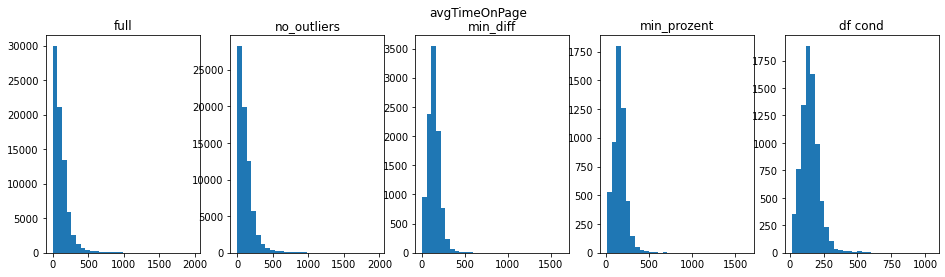

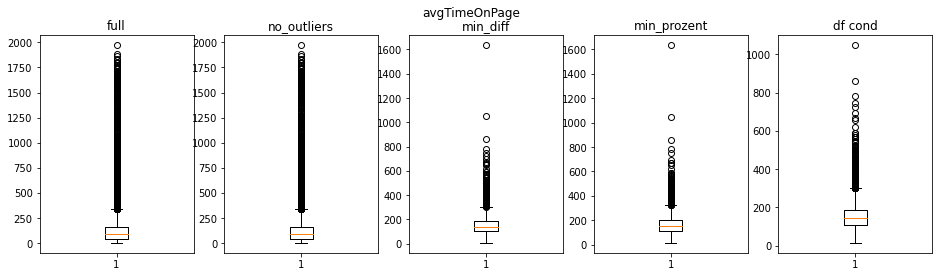

In [61]:
hist_boxplot('avgTimeOnPage')

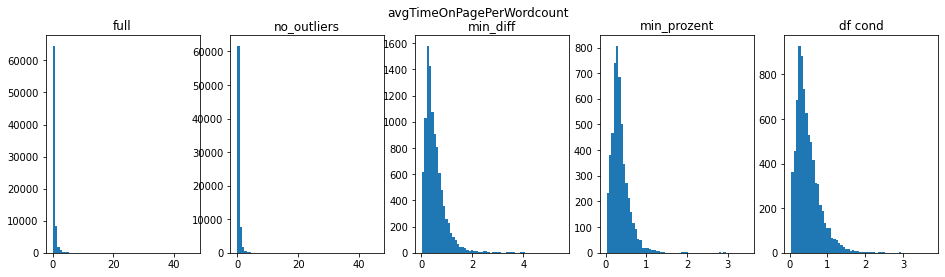

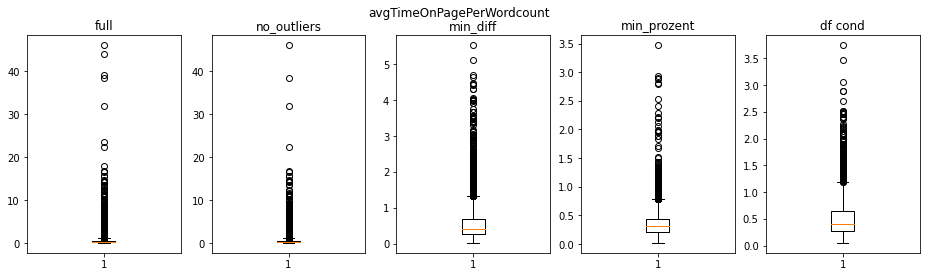

In [62]:
hist_boxplot('avgTimeOnPagePerWordcount', bins = 60)

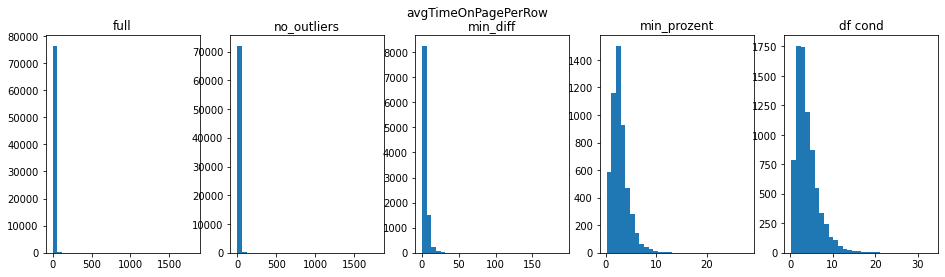

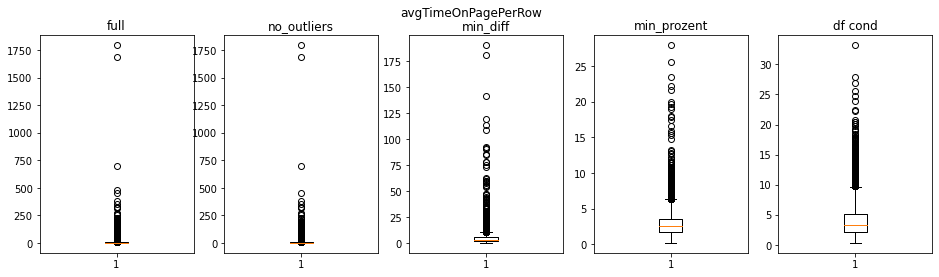

In [66]:
hist_boxplot('avgTimeOnPagePerRow')

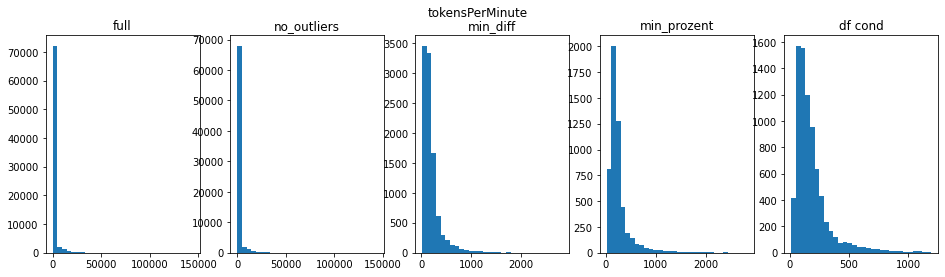

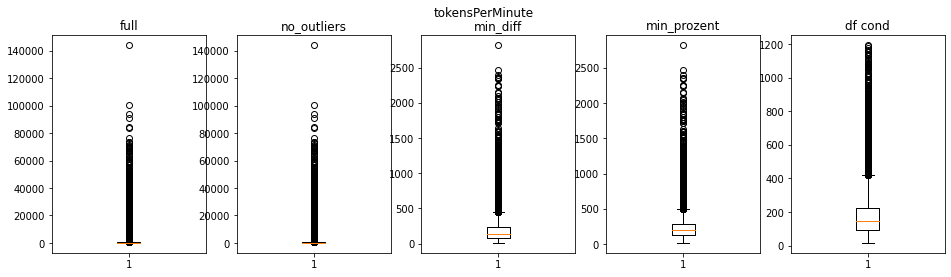

In [67]:
hist_boxplot('tokensPerMinute')
#hist_boxplot('tokensPerSecond')

/home/ruecker/miniconda3/envs/GPU/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/ruecker/miniconda3/envs/GPU/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


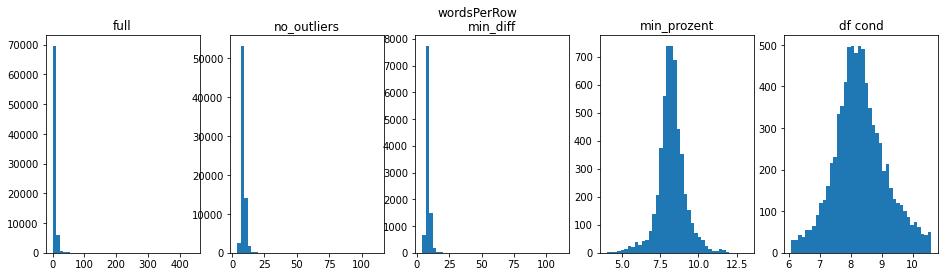

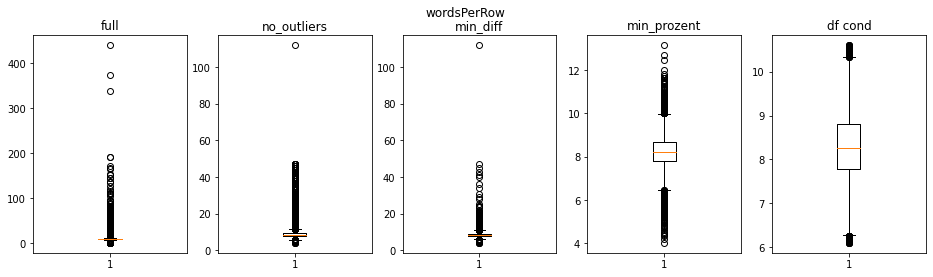

In [69]:
full['wordsPerRow'] = full.wordcount / full.zeilen
no_outliers['wordsPerRow'] = no_outliers.wordcount / no_outliers.zeilen
min_diff['wordsPerRow'] = min_diff.wordcount / min_diff.zeilen
min_prozent['wordsPerRow'] = min_prozent.wordcount / min_prozent.zeilen

hist_boxplot('wordsPerRow', 40)

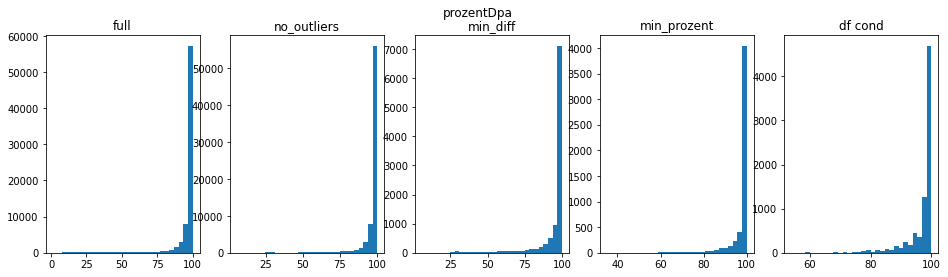

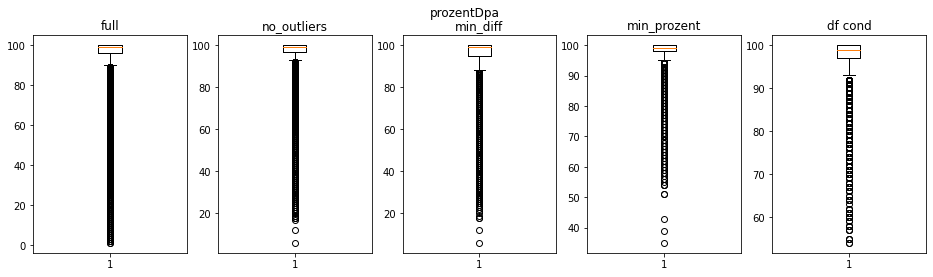

In [70]:
hist_boxplot('prozentDpa')
# Bedeutung: Wieviel Prozent des dpa-Textes ist in den Artikel eingeflossen?

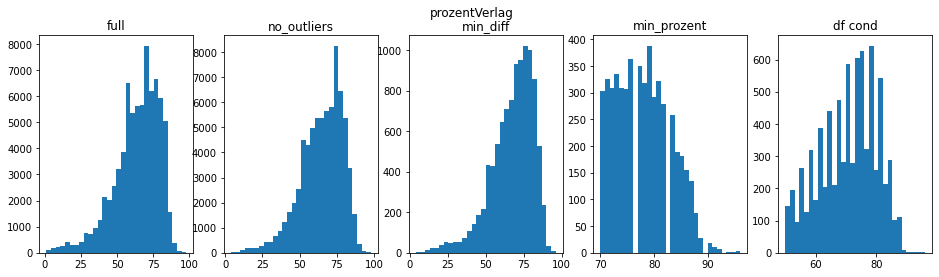

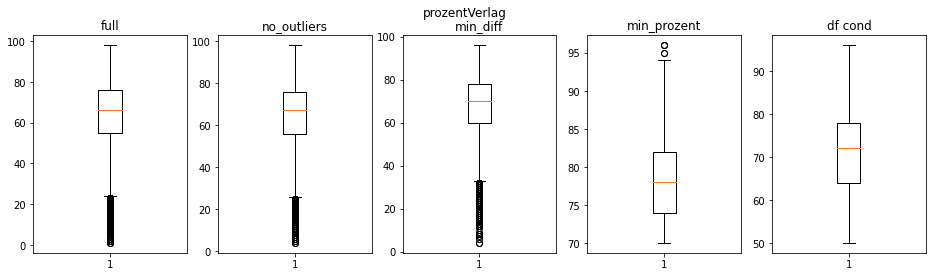

In [71]:
hist_boxplot('prozentVerlag')
# Bedeutung: zu wieviel Prozent besteht der Artikel aus dpa-Text?

In [52]:
#hist_boxplot('score_avgTimeOnPage')

In [72]:
def scatter(var1, var2, alpha = 0.02):
    fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1, 5, figsize= (16, 4))
    ax1.scatter(full[var1], full[var2], alpha = alpha)
    ax1.set_title('full')
    ax1.set_xlabel(var1)
    ax1.set_ylabel(var2)
    ax2.scatter(no_outliers[var1], no_outliers[var2], alpha = alpha)
    ax2.set_title('no_outliers')
    ax2.set_xlabel(var1)
    ax2.set_ylabel(var2)
    ax3.scatter(min_diff[var1], min_diff[var2], alpha = alpha)
    ax3.set_title('min_diff')
    ax3.set_xlabel(var1)
    ax3.set_ylabel(var2)
    ax4.scatter(min_prozent[var1], min_prozent[var2], alpha = alpha)
    ax4.set_title('min_prozent')
    ax4.set_xlabel(var1)
    ax4.set_ylabel(var2)
    ax5.scatter(df[var1], df[var2], alpha = alpha)
    ax5.set_title('df cond')
    ax5.set_xlabel(var1)
    ax5.set_ylabel(var2)
    
    plt.show()
    
    print("full:", st.pearsonr(full[var1], full[var2]))
    print("no_outliers:", st.pearsonr(no_outliers[var1], no_outliers[var2]))
    print("min_diff:", st.pearsonr(min_diff[var1], min_diff[var2]))
    print("min_prozent:", st.pearsonr(min_prozent[var1], min_prozent[var2]))
    print("df:", st.pearsonr(df[var1], df[var2]))
        

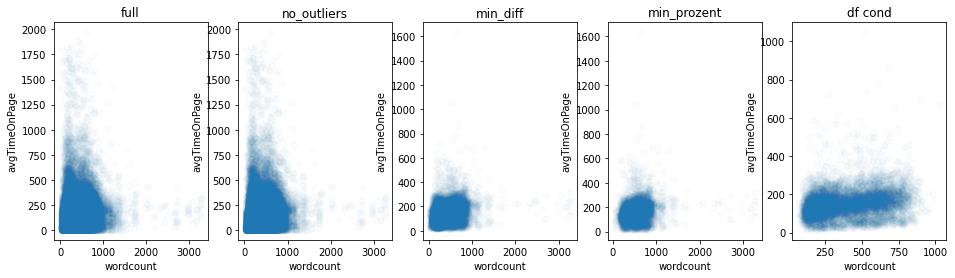

full: (0.18783602408669456, 0.0)
no_outliers: (0.19942966076685453, 0.0)
min_diff: (0.22693636138301326, 3.0049347288121296e-118)
min_prozent: (0.17155446895137488, 4.68638681434339e-36)
df: (0.22967704375151346, 4.2018637163680615e-95)


In [73]:
scatter('wordcount', 'avgTimeOnPage')

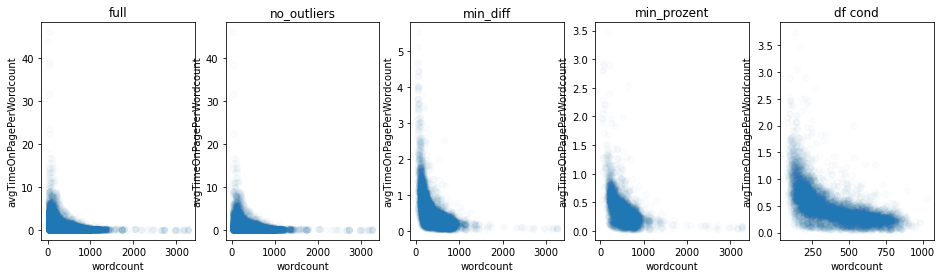

full: (-0.2468466933519962, 0.0)
no_outliers: (-0.2337181856662567, 0.0)
min_diff: (-0.5428093054799394, 0.0)
min_prozent: (-0.4708575212078582, 9.247227314454493e-289)
df: (-0.6211887000382036, 0.0)


In [74]:
scatter('wordcount', 'avgTimeOnPagePerWordcount')

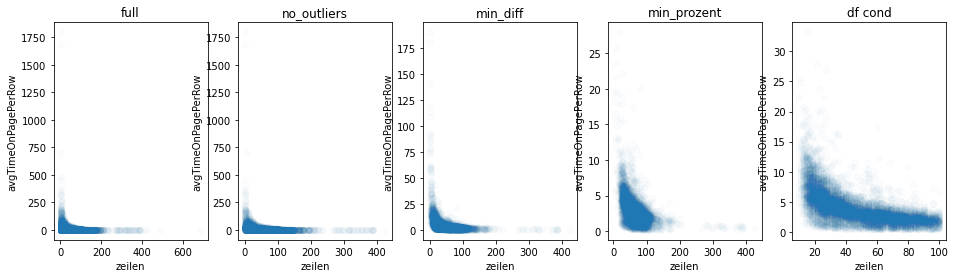

full: (-0.154660814597366, 0.0)
no_outliers: (-0.1462590029935615, 0.0)
min_diff: (-0.3909070013622023, 0.0)
min_prozent: (-0.46054614586887155, 9.755253926362229e-275)
df: (-0.6159992044022391, 0.0)


In [75]:
scatter('zeilen', 'avgTimeOnPagePerRow')

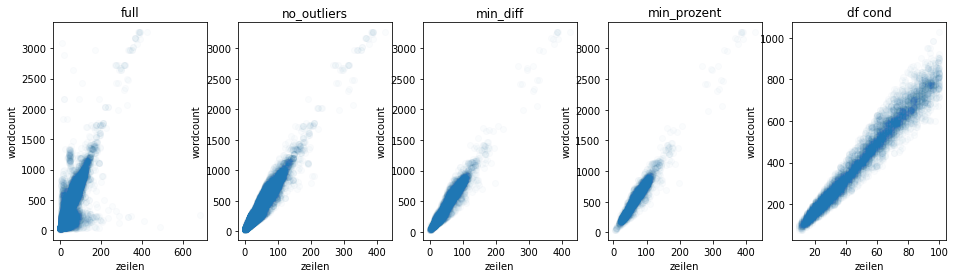

full: (0.9036112715788113, 0.0)
no_outliers: (0.9768537946579179, 0.0)
min_diff: (0.9742169097374107, 0.0)
min_prozent: (0.9725537026675937, 0.0)
df: (0.980522484876449, 0.0)


In [76]:
scatter('zeilen', 'wordcount')

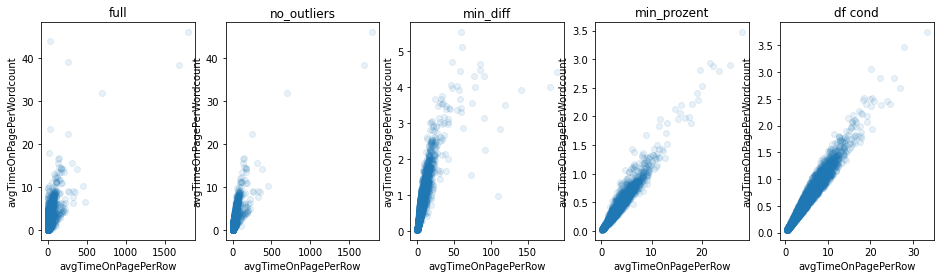

full: (0.7204801045063156, 0.0)
no_outliers: (0.7856955659360859, 0.0)
min_diff: (0.812399065443735, 0.0)
min_prozent: (0.9757734888997851, 0.0)
df: (0.9809742246710499, 0.0)


In [77]:
scatter('avgTimeOnPagePerRow', 'avgTimeOnPagePerWordcount', alpha = 0.1)

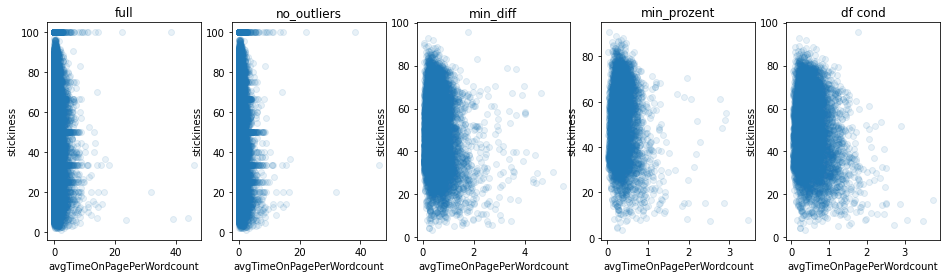

full: (-0.05174729402492004, 1.341140984809219e-46)
no_outliers: (-0.05141370765925284, 1.804903199002023e-43)
min_diff: (-0.2166849240323627, 9.94683893359191e-108)
min_prozent: (-0.16032176106542756, 1.2027683834200847e-31)
df: (-0.23700987875874932, 2.5185771140515402e-101)


In [117]:
scatter('avgTimeOnPagePerWordcount', 'stickiness', alpha = 0.1)

NOZ
bonn
aachener
SZ
TV
NOZ
bonn
aachener
SZ
TV


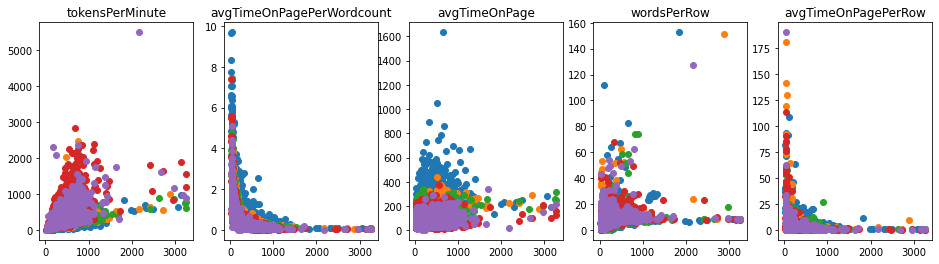

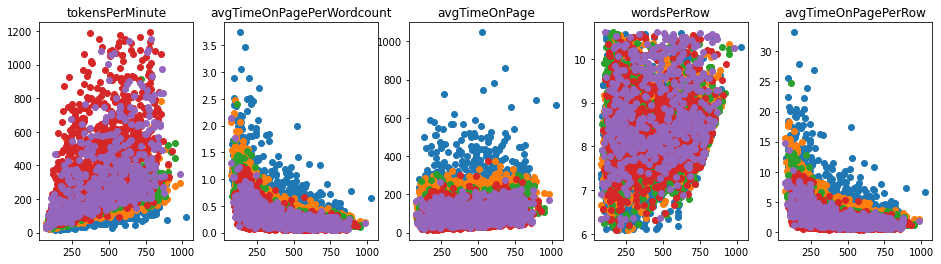

In [87]:
# warum sind da so seltsame Linien, häää?

fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1, 5, figsize= (16, 4))
for p in df.publisher.value_counts().keys():
    print(p)
    full_publ = full[full.publisher == p]
    full_publ = full_publ[(full_publ.pageviews - full_publ.exits) >= 50]
    #full_publ = full_publ[full_publ.ausreisser == 'nein']
    #full_publ = full_publ[full_publ.zeilen >= 20]

    #print(len(df_publ))
    ax1.scatter(full_publ.wordcount, full_publ.tokensPerMinute)
    ax1.set_title('tokensPerMinute')
    ax2.scatter(full_publ.wordcount, full_publ.avgTimeOnPagePerWordcount)
    ax2.set_title('avgTimeOnPagePerWordcount')
    ax3.scatter(full_publ.wordcount, full_publ.avgTimeOnPage)
    ax3.set_title('avgTimeOnPage')
    ax4.scatter(full_publ.wordcount, full_publ.wordsPerRow)
    ax4.set_title('wordsPerRow')
    ax5.scatter(full_publ.wordcount, full_publ.avgTimeOnPagePerRow)
    ax5.set_title('avgTimeOnPagePerRow')
    

fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1, 5, figsize= (16, 4))
for p in df.publisher.value_counts().keys():
    print(p)
    df_publ = df[df.publisher == p]

    #print(len(df_publ))
    ax1.scatter(df_publ.wordcount, df_publ.tokensPerMinute)
    ax1.set_title('tokensPerMinute')
    ax2.scatter(df_publ.wordcount, df_publ.avgTimeOnPagePerWordcount)
    ax2.set_title('avgTimeOnPagePerWordcount')
    ax3.scatter(df_publ.wordcount, df_publ.avgTimeOnPage)
    ax3.set_title('avgTimeOnPage')
    ax4.scatter(df_publ.wordcount, df_publ.wordsPerRow)
    ax4.set_title('wordsPerRow')
    ax5.scatter(df_publ.wordcount, df_publ.avgTimeOnPagePerRow)
    ax5.set_title('avgTimeOnPagePerRow')

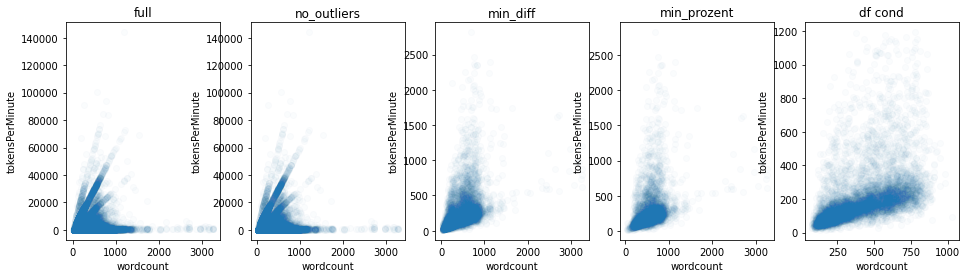

full: (0.06218399776127479, 1.577859369505951e-66)
no_outliers: (0.05733629742650611, 1.2031234142059688e-53)
min_diff: (0.5142218816191582, 0.0)
min_prozent: (0.3973732407066706, 1.1642941961731453e-198)
df: (0.5056211335529214, 0.0)


In [81]:
scatter('wordcount', 'tokensPerMinute')

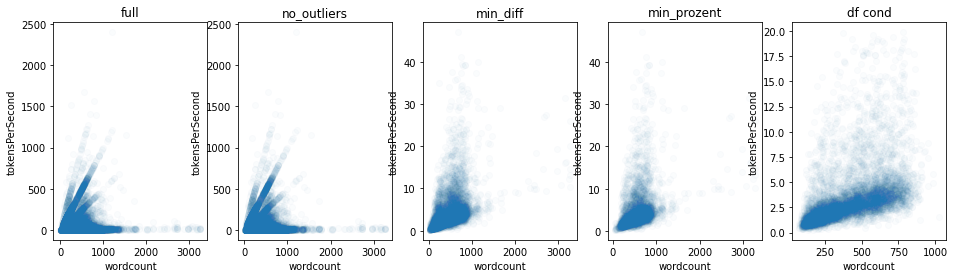

full: (0.0621839977612748, 1.577859369505951e-66)
no_outliers: (0.0573362974265061, 1.2031234142059688e-53)
min_diff: (0.514221881619158, 0.0)
min_prozent: (0.39737324070667057, 1.1642941961731453e-198)
df: (0.5056211335529214, 0.0)


In [82]:
scatter('wordcount', 'tokensPerSecond')

--> Die "Linien" kommen wohl so: Wenn die Anzahl an gemittelten Werten == 1 ist (also pageviews-exits ==1), bleiben oft als avgTimeOnPage ganzzahlige Werte (1 Sekunde, 2 Sekunden...), beim Teilen von Tokenzahl durch avgTimeOnPage entstehen dann diese "geraden Linien"

--> Denn etwa: 1000 Tokens pro 1 Sekunde oder 2 Sekunden etc.

--> wenn man pageviews-exits >= 50 setzt verschwiden sie

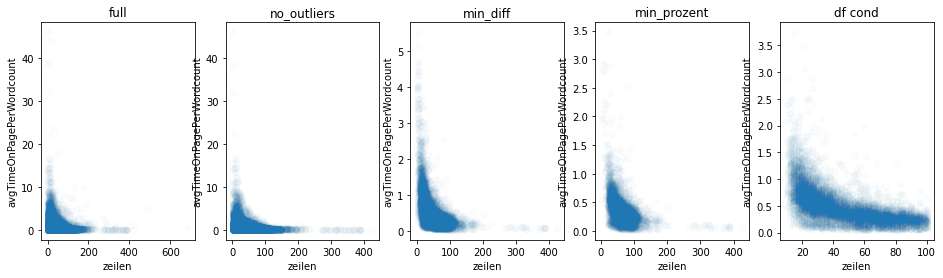

full: (-0.1877602550632351, 0.0)
no_outliers: (-0.22351116220966696, 0.0)
min_diff: (-0.5241868542281658, 0.0)
min_prozent: (-0.446689489032191, 1.2294768955611465e-256)
df: (-0.6125304868237686, 0.0)


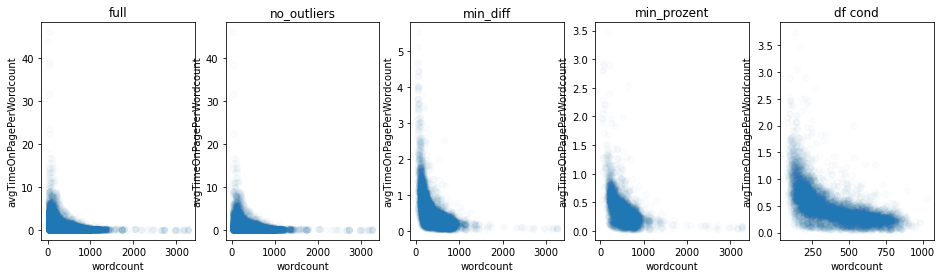

full: (-0.2468466933519962, 0.0)
no_outliers: (-0.2337181856662567, 0.0)
min_diff: (-0.5428093054799394, 0.0)
min_prozent: (-0.4708575212078582, 9.247227314454493e-289)
df: (-0.6211887000382036, 0.0)


In [89]:
scatter('zeilen', 'avgTimeOnPagePerWordcount')
scatter('wordcount', 'avgTimeOnPagePerWordcount')


# hier sieht man: angeblich ist die durchschnittliche Aufenthaltsdauer bei kürzeren Artikeln sehr groß.
# Das liegt aber meiner Meinung daran, dass gerade hier die Zeilenabgaben oft falsch sind
# (vielleicht wegen paywall, also sowas wie "Um diesen Artikel zu lesen, abbonieren Sie...")

# andererseits: wahrscheinlich werden längere Artikel tatsächlich schneller "weggeklickt", schwer zu unterscheiden

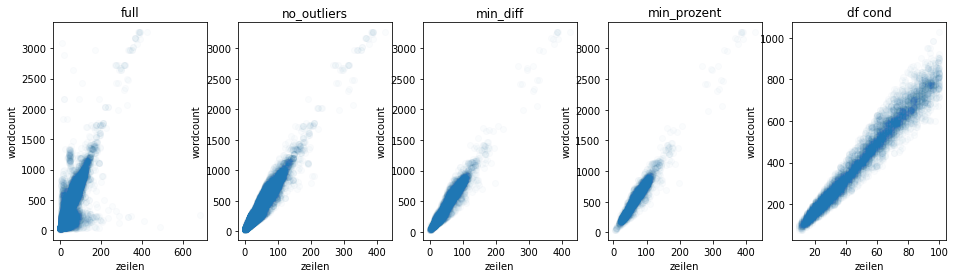

full: (0.9036112715788113, 0.0)
no_outliers: (0.9768537946579179, 0.0)
min_diff: (0.9742169097374107, 0.0)
min_prozent: (0.9725537026675937, 0.0)
df: (0.980522484876449, 0.0)


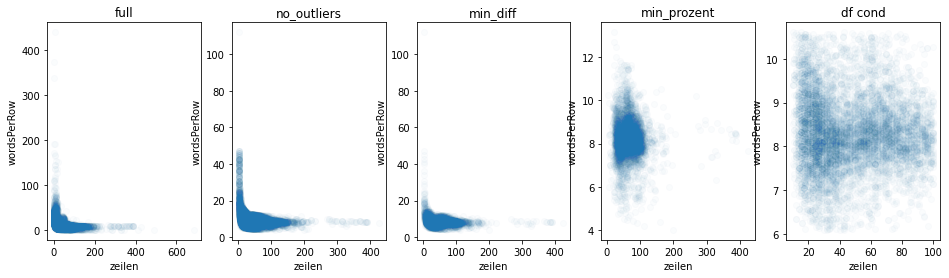

full: (-0.19442515233676294, 0.0)
no_outliers: (-0.24743924917008836, 0.0)
min_diff: (-0.16598917609387986, 2.2270506793988377e-63)
min_prozent: (-0.05216281048935984, 0.00015292574946803697)
df: (-0.04257952992329165, 0.0001530001682245911)


In [92]:
scatter('zeilen', 'wordcount')
scatter('zeilen', 'wordsPerRow')

--> Das zeigt, dass gerade bei den kleinen Zeilenzahlen (etwa <5) irgendwas nicht stimmt, bzw. die Tokenzahl sehr viel größer ist, als die Zeilenangabe vermuten lässt.
- die Zeilenzahl ist gerade bei <5 oft falsch (zu gering)
- oder: was könnte ein "echter" Grund dafür sein?

In [80]:
#scatter('avgTimeOnPagePerWordcount', 'bounceRate')

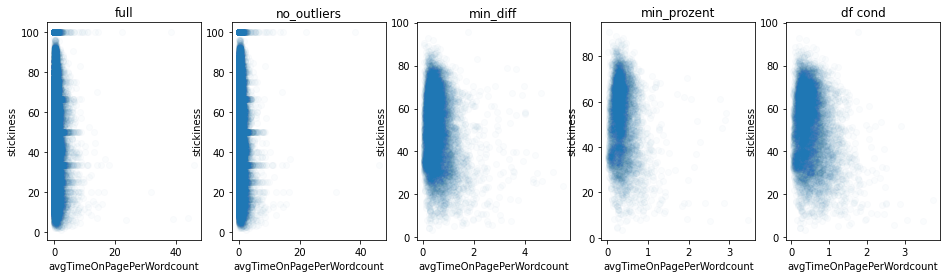

full: (-0.05174729402492004, 1.341140984809219e-46)
no_outliers: (-0.05141370765925284, 1.804903199002023e-43)
min_diff: (-0.2166849240323627, 9.94683893359191e-108)
min_prozent: (-0.16032176106542756, 1.2027683834200847e-31)
df: (-0.23700987875874932, 2.5185771140515402e-101)


In [93]:
scatter('avgTimeOnPagePerWordcount', 'stickiness')

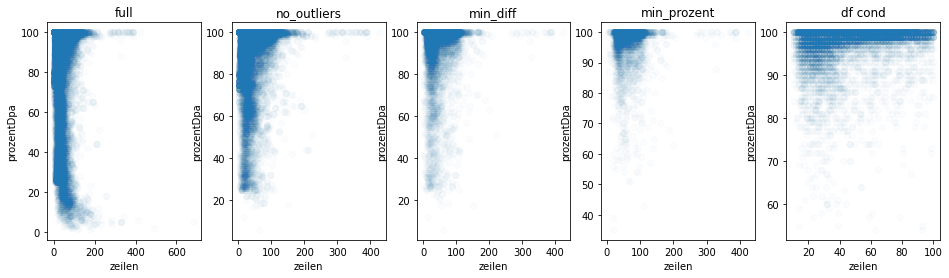

full: (-0.0064139219355640615, 0.06175492549626718)
no_outliers: (0.1096725757005344, 5.713719558049628e-212)
min_diff: (0.10995915800425732, 1.4179112700368294e-28)
min_prozent: (0.04903900612052052, 0.0003719232554297529)
df: (0.15829713909213508, 1.6509566723710303e-45)


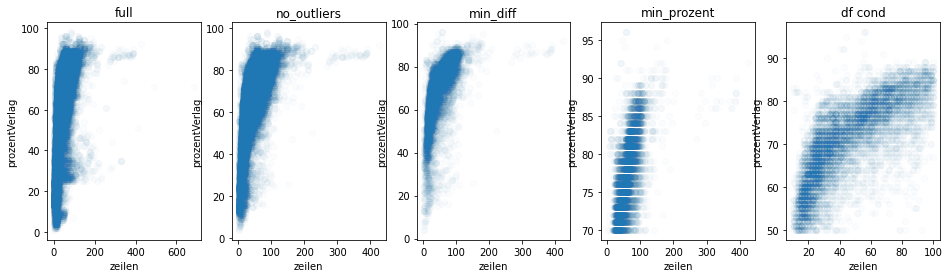

full: (0.6279462054306159, 0.0)
no_outliers: (0.7143650045401821, 0.0)
min_diff: (0.6139673363259749, 0.0)
min_prozent: (0.5629828948029763, 0.0)
df: (0.7331601480288203, 0.0)


In [86]:
scatter('zeilen', 'prozentDpa')
scatter('zeilen', 'prozentVerlag')

--> Spekulation: das könnte ein Hinweis darauf sein, dass Werbung/Bilder etc. zur Anteilsbildung dazugenommen wurden. Und je länger der tatsächliche Artikeltext, desto größer ist sein Anteil im vergleich zu (etwa gleichbleibender) Werbung ?

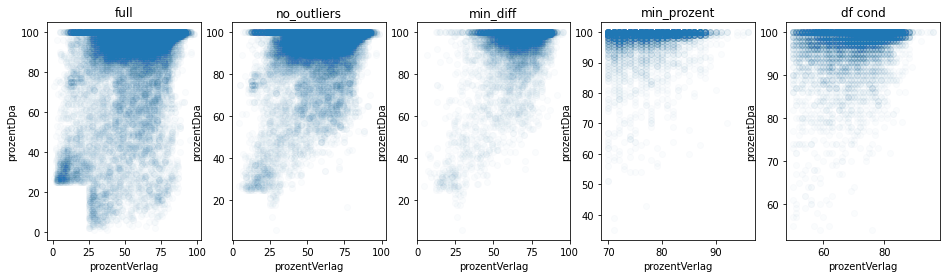

full: (0.3863625348068187, 0.0)
no_outliers: (0.34808026860516583, 0.0)
min_diff: (0.5032090863799463, 0.0)
min_prozent: (0.16435599483430194, 3.407044660743478e-33)
df: (0.24802022216795083, 4.4415929379063045e-111)


In [94]:
#scatter('prozentDpa', 'prozentVerlag')
scatter('prozentVerlag', 'prozentDpa')

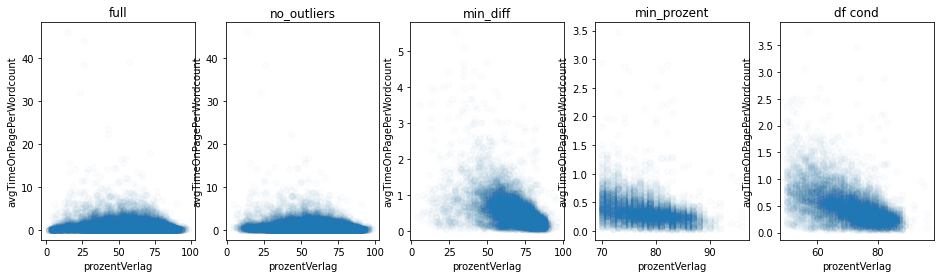

full: (-0.17220395611017553, 0.0)
no_outliers: (-0.20610361611300088, 0.0)
min_diff: (-0.4884831724129671, 0.0)
min_prozent: (-0.3281282125088802, 2.2887420624239688e-132)
df: (-0.5116922351420616, 0.0)


In [96]:
scatter('prozentVerlag', 'avgTimeOnPagePerWordcount')

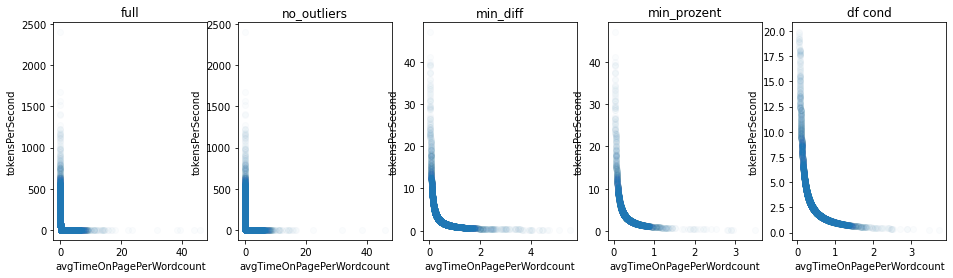

full: (-0.15803630435824803, 0.0)
no_outliers: (-0.16878718196825465, 0.0)
min_diff: (-0.5102811153966864, 0.0)
min_prozent: (-0.5494457711490852, 0.0)
df: (-0.6505700598745671, 0.0)


In [97]:
scatter('avgTimeOnPagePerWordcount', 'tokensPerSecond')

# ERKENNTNISSE:
* generell: wichtiger als pageviews ist pageviews-exits, denn dadurch wird timeOnPage geteilt!
* Grundproblem: Texte die ich habe sind nicht die Texte, zu denen die Werte gehören...
* vor allem bei Division durch Textlänge ist das natürlich unglücklich
* Zeilenabgaben sind schonmal gut, aber irgendwie auch nicht ideal
* Mindestzahl an Zeilen sinnvoll, denn bei denen mit <5 ist alles "fälscher" als bei den längeren
* prozentVerlag sollte möglichst hoch sein, aber ich habe Vorbehalte gegenüber diesen Angaben, denn man findet Beispiele, bei denen das offensichtlich falsch ist
* Aufenthaltsdauer pro Wort korreliert relativ stark mit der Textlänge. Das kann an dem durch das Teilen durch eine falsche Textlänge eingebrachten Fehler liegen (oder anderen Fehlern...) oder aber tatsächlich stimmen: Je länger der Artikel, desto doller "überfliegt" man ihn oder liest ihn einfach nicht ganz.

In [105]:
df_sorted = df.sort_values(by=['avgTimeOnPagePerWordcount'], ascending = False)
#full_sorted = full.sort_values(by=['avgTimeOnPagePerWordcount'], ascending = False)

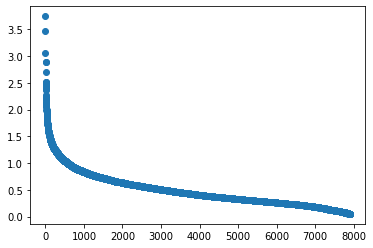

In [106]:
plt.scatter(range(len(df_sorted)), df_sorted.avgTimeOnPagePerWordcount)
#plt.scatter(range(len(df_sorted)), df_sorted.prozentVerlag, alpha=0.2)

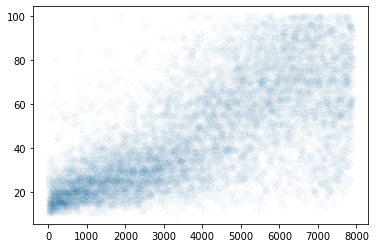

In [112]:
plt.scatter(range(len(df_sorted)), df_sorted.zeilen, alpha=0.02)
# hier sieht man: die Artikel mit den angeblich so langen Aufenthaltsdauern sind die mit kleinen Zeilen?

In [107]:
df_sorted.head(10)

,pageviews,entrances,exits,bounces,timeOnPage,conversions,avgTimeOnPage,stickiness,entranceRate,bounceRate,sharePageviews,n,nObs,score_pageviews,score_avgTimeOnPage,score_entranceRate,score_stickiness,SCORE,kategorie,rubrik,subRubrik,titel,pagePath,dpaGuid,zeilen,prozentDpa,prozentVerlag,categoryCode,creationDate,flextags,genre,geoArea,importance,keywords,lifetime,limbic,links,picture,service,subject,subjectBroader,subjectCode,teaser,text,titelH1,titelH3,urgency,wikidata,wordcount,category,ratgeber,format,dateLoaded,nLoadAttempts,ausreisser,publisher,city,text_preprocessed,nr_tokens,mean_token_length,nr_tokens_teaser,nr_tokens_titelH1,nr_char,nr_sentences,mean_sentence_length,avgTimeOnPagePerWordcount,avgTimeOnPagePerRow,tokensPerMinute,avgTimeOnPagePerNr_char,pageviews-exits,wordsPerRow,time_class,tokensPerSecond
articleId,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2080646,483,393,400,83,41308,NaN,497.686747,17.184265,81.366460,17.184265,100,1,173,19,19,17,9,64,deutschland-und-welt,wirtschaft,NaN,keine-kreuzfahrten-mit-aida-cruises-bis-ende-a...,https://www.noz.de/deutschland-und-welt/wirtsc...,200702-99-648774,15,100,57,dpacat:wi,2020-07-02 14:13:36,NaN,Meldung,Deutschland,NaN,"Corona__,__Covid-19",NaN,NaN,Reisehinweise Aida,NaN,"dpasrv:bid__,__dpasrv:bdt","Tourismus__,__Schifffahrt","Reise__,__Transport","medtop:20000564__,__medtop:20000343",NaN,Rostock (dpa) - Die Kreuzfahrtreederei Aida Cr...,Keine Kreuzfahrten mit Aida Cruises bis Ende A...,NaN,4,NaN,133,wi,0,NewsML-G2,2020-08-19 13:20:04,1,nein,NOZ,Rostock,Die Kreuzfahrtreederei Aida Cruises hat ihre F...,146,5.095890,0,10,888,9.0,16.222222,3.742006,33.179116,16.034182,0.560458,83,8.866667,1,0.267236
2067692,6630,6138,6117,1898,300831,NaN,586.415205,7.737557,92.579186,28.627451,100,1,3071,44,20,20,5,89,deutschland-und-welt,niedersachsen,NaN,usa-verlegen-soldaten-fuer-defender-uebung-nac...,https://www.noz.de/deutschland-und-welt/nieder...,200611-99-387033,21,100,73,dpacat:pl,2020-06-11 10:19:21,NaN,Meldung,"Deutschland__,__USA__,__Polen",NaN,Bundeswehr,NaN,NaN,NaN,NaN,"dpasrv:bdt__,__dpasrv:bid",Verteidigung,Regierung,medtop:20000598,NaN,Berlin (dpa) - Die USA verlegen für die wegen ...,USA verlegen 600 Soldaten für «Defender»-Übung...,NaN,4,NaN,169,pl,0,NewsML-G2,2020-08-19 13:20:04,1,nein,NOZ,Berlin,Die USA verlegen für die wegen der Corona-Pand...,172,6.145349,0,11,1240,14.0,12.285714,3.469912,27.924534,17.291503,0.472915,513,8.047619,1,0.288192
2008669,6907,6281,6338,2638,250512,NaN,440.267135,8.238019,90.936731,38.193137,100,1,3588,44,18,20,6,88,deutschland-und-welt,vermischtes,NaN,alexander-klaws-zum-zweiten-mal-vater-so-heiss...,https://www.noz.de/deutschland-und-welt/vermis...,200303-99-170393,22,74,56,dpacat:vm,2020-03-03 14:02:44,NaN,Meldung,NaN,NaN,NaN,NaN,NaN,"Biografie Alexander Klaws__,__Instagram Post",NaN,"dpasrv:bdt__,__dpasrv:bid",Leute,Vermischtes,medtop:20000502,NaN,Hamburg (dpa) - Der Sänger und Musicaldarstell...,Sänger Alexander Klaws zum zweiten Mal Papa,NaN,4,NaN,144,vm,0,NewsML-G2,2020-04-21 19:33:11,1,nein,NOZ,Hamburg,Der Sänger und Musicaldarsteller Alexander Kla...,148,5.398649,0,7,957,11.0,13.454545,3.057411,20.012143,19.624449,0.460049,569,6.545455,1,0.327074
2011569,1681,606,810,187,244624,NaN,280.854191,51.814396,36.049970,11.124331,100,1,606,32,16,3,17,68,deutschland-und-welt,vermischtes,NaN,kampf-gegen-coronavirus-italien-riegelt-norden-ab,https://www.noz.de/deutschland-und-welt/vermis...,200308-99-234103,11,100,82,dpacat:vm,2020-03-08 02:49:17,NaN,Überblick,Italien,NaN,Covid-19,NaN,NaN,NaN,NaN,"dpasrv:edi__,__dpasrv:erd__,__dpasrv:edt__,__d...","Krankheit__,__Gesundheit__,__Wissenschaft","Krankheit__,__Medizin, Gesundheit__,__Wissensc...","medtop:20000446__,__dpasubject:346__,__dpasubj...",NaN,Rom (dpa) - Im Kampf gegen die Ausbreitung des...,Coronavirus: Italien will weitere Teile im Nor...,NaN,3,NaN,97,vm,0,NewsML-G2,2020-04-21 19:33:11,1,nein,NOZ,Rom,Im Kampf gegen die Ausbreitung des neuartigen ...,94

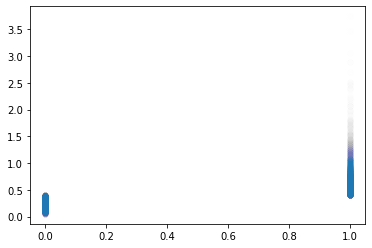

In [166]:
plt.scatter(df.time_class, df.avgTimeOnPagePerWordcount, alpha = 0.002)

In [113]:
print(np.min(df[df.time_class == 1].avgTimeOnPagePerWordcount))
print(np.max(df[df.time_class == 1].avgTimeOnPagePerWordcount))
print("---")
print(np.mean(df[df.time_class == 1].stickiness)) # hm, das ist nicht so schön, längere Aufenthaltsdauer hat geringere Stickiness...
print(np.mean(df[df.time_class == 0].stickiness))
print("---")
print(np.mean(df[df.time_class == 1].avgTimeOnPagePerWordcount))
print(np.mean(df[df.time_class == 0].avgTimeOnPagePerWordcount))

0.400023540489642
3.742005616450767
---
49.83130789482491
54.29337415083333
---
0.7165253672703568
0.25322149635584834


In [136]:
df[df.time_class == 1].head()

,pageviews,entrances,exits,bounces,timeOnPage,conversions,avgTimeOnPage,stickiness,entranceRate,bounceRate,sharePageviews,n,nObs,score_pageviews,score_avgTimeOnPage,score_entranceRate,score_stickiness,SCORE,kategorie,rubrik,subRubrik,titel,pagePath,dpaGuid,zeilen,prozentDpa,prozentVerlag,categoryCode,creationDate,flextags,genre,geoArea,importance,keywords,lifetime,limbic,links,picture,service,subject,subjectBroader,subjectCode,teaser,text,titelH1,titelH3,urgency,wikidata,wordcount,category,ratgeber,format,dateLoaded,nLoadAttempts,ausreisser,publisher,city,text_preprocessed,nr_tokens,mean_token_length,nr_tokens_teaser,nr_tokens_titelH1,nr_char,nr_sentences,mean_sentence_length,avgTimeOnPagePerWordcount,avgTimeOnPagePerRow,tokensPerMinute,avgTimeOnPagePerNr_char,pageviews-exits,wordsPerRow,time_class,tokensPerSecond
articleId,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
49297055,109,24,31,11,7165,NaN,91.858974,71.559633,22.018349,10.091743,100,1,79,11,11,2,20,44,news,panorama,NaN,unfall-an-strassenbahn-halt-verletzte-noch-in-...,https://www.general-anzeiger-bonn.de/news/pano...,200302-99-153664,18,100,52,dpacat:vm,2020-03-02 12:51:46,NaN,Meldung,Deutschland,NaN,NaN,NaN,NaN,Mitteilung der Polizei,NaN,"dpasrv:bdt__,__dpasrv:bid","Unfälle__,__Verkehr","Katastrophe und Unglück__,__Wirtschaft und Fin...","dpasubject:62__,__dpasubject:232",NaN,Essen (dpa) - Nach dem schweren Unfall in Esse...,Nach Unfall an Haltestelle in Essen noch ein M...,NaN,4,NaN,142,vm,0,NewsML-G2,2020-04-21 19:33:11,1,nein,bonn,Essen,"Nach dem schweren Unfall in Essen, bei dem am ...",139,5.848921,0,11,970,11.0,12.636364,0.646894,5.103276,92.750872,0.094700,78,7.888889,1,1.545848
49309881,254,82,110,54,27715,NaN,192.465278,56.692913,32.283465,21.259843,100,1,136,14,14,3,18,49,news,politik,ausland,nordkorea-unternimmt-neue-waffentests_aid-4930...,https://www.general-anzeiger-bonn.de/news/poli...,200302-99-151235,52,100,84,dpacat:pl,2020-03-02 11:07:33,NaN,Zusammenfassung,"Südkorea__,__Nordkorea",NaN,NaN,NaN,NaN,NaN,NaN,"dpasrv:edi__,__dpasrv:erd__,__dpasrv:edt__,__d...",Konflikte,"Krise, Krieg, Konflikte",dpasubject:114,Nordkorea nahm längere Zeit Abstand von seinen...,Seoul (dpa) - Die selbst erklärte Atommacht No...,Seoul: Nordkorea nimmt wieder Raketentests auf,NaN,3,NaN,424,pl,0,NewsML-G2,2020-04-21 19:33:11,1,nein,bonn,Seoul,Die selbst erklärte Atommacht Nordkorea hat na...,428,6.348131,28,6,3184,26.0,16.461538,0.453928,3.701255,132.179686,0.060448,144,8.153846,1,2.202995
49310881,888,610,643,473,66422,NaN,271.110204,27.590090,68.693694,53.265766,100,1,335,28,16,12,12,68,news,panorama,NaN,hupen-als-geheimsprache-in-kairo_aid-49310881,https://www.general-anzeiger-bonn.de/news/pano...,200301-99-144607,65,100,75,dpacat:vm,2020-03-02 06:30:41,NaN,KORR-Bericht,"Ägypten__,__Indien__,__Deutschland",NaN,Kurioses,NaN,NaN,"Video Polizei Mumbai__,__Bericht India Today__...",NaN,"dpasrv:edi__,__dpasrv:erd__,__dpasrv:edt__,__d...","Automobilindustrie__,__Verkehr__,__Gesellschaf...","Metall- und Technische Industrie__,__Wirtschaf...","medtop:20000296__,__dpasubject:232__,__medtop:...",Zu Stoßzeiten ist in Kairos Verkehr gefühlt al...,Kairo (dpa) - Wer im deutschen Autoverkehr auf...,«Ich liebe dich» bis «Fuck you»: Hupen als Geh...,NaN,4,NaN,591,vm,0,NewsML-G2,2020-04-21 19:33:11,1,nein,bonn,Kairo,Wer im deutschen Autoverkehr auf die Hupe drüc...,609,5.397373,42,15,3966,37.0,16.459459,0.458731,4.170926,130.795520,0.068359,245,9.092308,1,2.179925
49318053,4339,3089,2997,2317,255559,NaN,190.431446,30.928785,71.191519,53.399401,100,1,1668,39,14,13,13,79,news,panorama,NaN,polizei-ermittelt-nach-vermutetem-diebstahl-vo...,https://www.general-anzeiger-bonn.de/news/pano...,200302-99-153809,15,100,54,dpacat:vm,2020-03-02 12:54:36,NaN,Meldung,Deutschland,NaN,"Kurioses__,__Covid-19__,__Sars-CoV-2",NaN,NaN,NaN,NaN,"dpasrv:bdt__,__dpasrv:bid","Krankheit__,__Gesundheit__,__Wissenschaft__,__...","Krankheit__,__Medizin, Gesundheit__,__Wissensc...","medtop:20

In [169]:
df2 = utils.get_conditioned_df(delete_zeilen_mismatch=False)

/home/ruecker/miniconda3/envs/GPU/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3319: DtypeWarning: Columns (46) have mixed types. Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


Shape of raw df: (84887, 71)
Shape of remaining df after conditioning: (8477, 73)


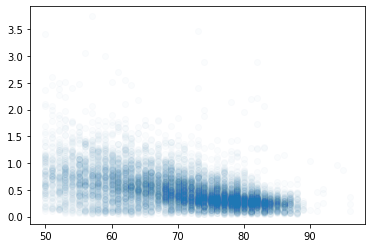

In [170]:
plt.scatter(df2.prozentVerlag, df2.avgTimeOnPagePerWordcount, alpha=0.02)

In [118]:
trial = utils.get_raw_df()
trial.set_index('articleId', inplace=True)
trial = trial[trial['pageviews-exits'] >= 50]
print(trial.shape)

/home/ruecker/miniconda3/envs/GPU/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3242: DtypeWarning: Columns (46) have mixed types. Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


Shape of raw df: (84887, 71)
(11469, 70)


In [119]:
# conditioning "by hand"
trial = utils.get_conditioned_df(min_diff_pageviews_exits = 50,
                       min_wordcount = 200,
                       max_wordcount = 1000000000, # dummy
                       min_zeilen = 5, #6, #10, # some have very little zeilen, doesn't make sense (maybe because payed content?)
                       min_avgTimeOnPage = 0,
                       max_avgTimeOnPage = 1200, # 1200, # max 20 minutes
                       min_avgTimeOnPagePerWordcount = 0.0001,
                       max_avgTimeOnPagePerWordcount = 100000,
                       delete_outliers = False, #True,
                       delete_zeilen_mismatch = False, #True, #True, # delete articles where match of zeilen and wordcount ist far off
                       add_time_class = True, # adds a binary time_class label
                       min_prozentDpa = 80,
                       min_prozentVerlag = 50
                       )

/home/ruecker/miniconda3/envs/GPU/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3319: DtypeWarning: Columns (46) have mixed types. Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


Shape of raw df: (84887, 71)
Shape of remaining df after conditioning: (6650, 73)


In [120]:
trial.set_index('articleId', inplace=True)

In [121]:
trial.ausreisser.value_counts()

nein    6542
ja       108
Name: ausreisser, dtype: int64

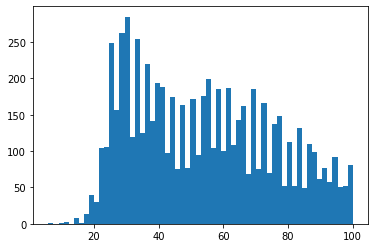

In [122]:
plt.hist(trial.zeilen, 60)
plt.show()

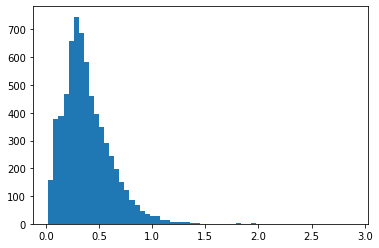

In [123]:
plt.hist(trial.avgTimeOnPagePerWordcount, 60)
plt.show()

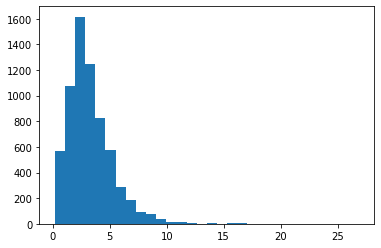

In [124]:
plt.hist(trial.avgTimeOnPagePerRow, 30)
plt.show()

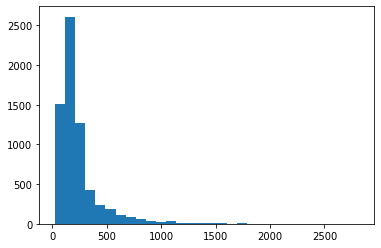

In [125]:
plt.hist(trial.tokensPerMinute, 30)
plt.show()

(-0.2468466933519962, 0.0)


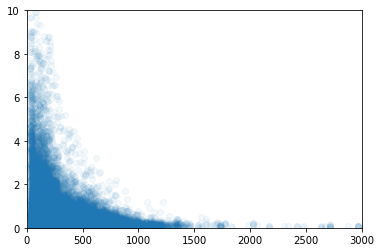

In [131]:
plt.scatter(full.wordcount, full.avgTimeOnPagePerWordcount, alpha = 0.05)
plt.xlim(0, 3000)
plt.ylim(0, 10)
print(st.pearsonr(full.wordcount, full.avgTimeOnPagePerWordcount))

(-0.6211887000382036, 0.0)


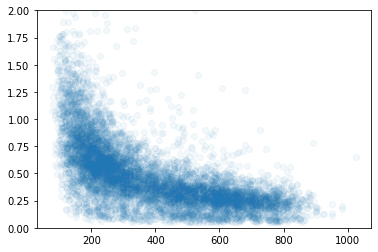

In [148]:
plt.scatter(df.wordcount, df.avgTimeOnPagePerWordcount, alpha = 0.05)
#plt.xlim(0, 1000)
plt.ylim(0, 2)
print(st.pearsonr(df.wordcount, df.avgTimeOnPagePerWordcount))

(0.18783602408669456, 0.0)


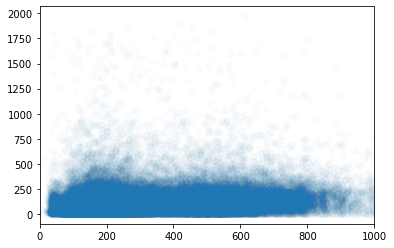

In [139]:
plt.scatter(full.wordcount, full.avgTimeOnPage, alpha = 0.02)
plt.xlim(0, 1000)
#plt.ylim(0, 600)
print(st.pearsonr(full.wordcount, full.avgTimeOnPage))

(0.22967704375151346, 4.2018637163680615e-95)


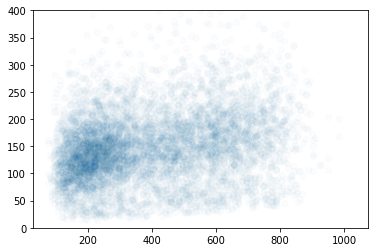

In [145]:
plt.scatter(df.wordcount, df.avgTimeOnPage, alpha = 0.02)
#plt.xlim(0, 1000)
plt.ylim(0, 400)
print(st.pearsonr(df.wordcount, df.avgTimeOnPage))

In [149]:
trial.sort_values('avgTimeOnPagePerWordcount', ascending=False).head(10)

,pageviews,entrances,exits,bounces,timeOnPage,conversions,avgTimeOnPage,stickiness,entranceRate,bounceRate,sharePageviews,n,nObs,score_pageviews,score_avgTimeOnPage,score_entranceRate,score_stickiness,SCORE,kategorie,rubrik,subRubrik,titel,pagePath,dpaGuid,zeilen,prozentDpa,prozentVerlag,categoryCode,creationDate,flextags,genre,geoArea,importance,keywords,lifetime,limbic,links,picture,service,subject,subjectBroader,subjectCode,teaser,text,titelH1,titelH3,urgency,wikidata,wordcount,category,ratgeber,format,dateLoaded,nLoadAttempts,ausreisser,publisher,city,text_preprocessed,nr_tokens,mean_token_length,nr_tokens_teaser,nr_tokens_titelH1,nr_char,nr_sentences,mean_sentence_length,avgTimeOnPagePerWordcount,avgTimeOnPagePerRow,tokensPerMinute,avgTimeOnPagePerNr_char,pageviews-exits,wordsPerRow,time_class
articleId,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2042484,726,621,614,128,64662,NaN,577.339286,15.426997,85.537190,17.630854,100,1,241,24,20,19,9,72,deutschland-und-welt,politik,NaN,bundesarbeitsminister-plant-gesetz-fuer-recht-...,https://www.noz.de/deutschland-und-welt/politi...,200425-99-835141,26,84,74,dpacat:wi,2020-04-26 00:01:02,NaN,Meldung,Deutschland,NaN,"Corona__,__Covid-19",NaN,NaN,NaN,NaN,"dpasrv:bdt__,__dpasrv:bid","Gesundheit__,__Krankheit__,__Arbeit","Medizin, Gesundheit__,__Krankheit__,__Arbeit, ...","dpasubject:346__,__medtop:20000446__,__dpasubj...",NaN,Berlin (dpa) - Bundesarbeitsminister Hubertus ...,Heil plant bis Herbst Gesetz für Recht auf Hom...,NaN,4,NaN,200,wi,0,NewsML-G2,2020-04-27 02:25:04,1,nein,NOZ,Berlin,Bundesarbeitsminister Hubertus Heil (SPD) will...,212,4.985849,0,9,1282,11.0,19.272727,2.886696,22.205357,20.785005,0.450343,112,7.692308,1
2112603,2546,2365,2405,1123,102262,NaN,725.262411,5.538099,92.890809,44.108405,100,1,886,34,20,20,5,79,deutschland-und-welt,vermischtes,NaN,asteroid-rast-dicht-an-der-erde-vorbei,https://www.noz.de/deutschland-und-welt/vermis...,200828-99-348195,27,100,61,dpacat:vm,2020-08-31 11:11:43,NaN,Meldung,"Deutschland__,__International",NaN,Astronomie,NaN,NaN,"Tweet DLR_Next__,__Center for Near-Earth Objec...",NaN,"dpasrv:bid__,__dpasrv:bdt",Wissenschaft,"Wissenschaft, Technik, Forschung",dpasubject:106,NaN,Köln (dpa) - Ein mehrfamilienhausgroßer Astero...,Mehrfamilienhaus im Anflug: Asteroid rast dich...,NaN,3,NaN,268,vm,0,NewsML-G2,2020-09-01 03:32:14,1,nein,NOZ,Köln,Ein mehrfamilienhausgroßer Asteroid wird am Di...,279,5.340502,0,10,1789,14.0,19.928571,2.706203,26.861571,22.171286,0.405401,141,9.925926,1
2008726,407,325,344,72,32134,NaN,510.063492,15.479115,79.852580,17.690418,100,1,239,17,19,16,9,61,deutschland-und-welt,vermischtes,NaN,drogendealer-soll-polizisten-rabatt-auf-kokain...,https://www.noz.de/deutschland-und-welt/vermis...,200303-99-168961,25,100,60,dpacat:vm,2020-03-03 12:49:40,NaN,Meldung,Deutschland,NaN,NaN,NaN,NaN,NaN,NaN,"dpasrv:bdt__,__dpasrv:bid","Kriminalität__,__Polizei__,__Prozess (Gericht)","Justiz, Kriminalität__,__Sicherheitskräfte (BG...","medtop:20000082__,__medtop:20000133__,__medtop...",NaN,München (dpa) - Ein Drogendealer soll Münchner...,Drogendealer soll Polizisten Rabatt auf Kokain...,NaN,4,NaN,203,vm,0,NewsML-G2,2020-04-21 19:33:11,1,nein,NOZ,München,Ein Drogendealer soll Münchner Polizisten mit ...,211,5.853081,0,8,1461,11.0,19.181818,2.512628,20.402540,23.879380,0.349119,63,8.120000,1
2109163,685,627,612,192,40076,NaN,548.986301,10.656934,91.532847,28.029197,100,1,249,23,20,20,7,70,deutschland-und-welt,gut-zu-wissen,NaN,who-empfiehlt-masken-fuer-kinder-ab-zwoelf-jahren,https://www.noz.de/deutschland-und-welt/gut-zu...,200822-99-264938,23,100,63,dpacat:pl,2020-08-22 13:13:57,NaN,Meldung,International,NaN,"Corona__,__Covid-19__,__Kinder",NaN,NaN,"Q&A von WHO und Unicef__,__Leitfaden von WHO u...",NaN,"dpasrv:erd-ch__,__dpasrv:edi__,__dpasrv:erd__,...","Gesundheit__,__Krankheit","Medizin, Gesundheit__,__Krankheit","dpasubject:346__,__medtop:20000446",NaN,Genf (dpa) - Für Kinder ab zwölf Jahren sollen...,WHO

In [73]:
trial.sort_values('prozentVerlag', ascending = False).head(10)

,pageviews,entrances,exits,bounces,timeOnPage,conversions,avgTimeOnPage,stickiness,entranceRate,bounceRate,sharePageviews,n,nObs,score_pageviews,score_avgTimeOnPage,score_entranceRate,score_stickiness,SCORE,kategorie,rubrik,subRubrik,titel,pagePath,dpaGuid,zeilen,prozentDpa,prozentVerlag,categoryCode,creationDate,flextags,genre,geoArea,importance,keywords,lifetime,limbic,links,picture,service,subject,subjectBroader,subjectCode,teaser,text,titelH1,titelH3,urgency,wikidata,wordcount,category,ratgeber,format,dateLoaded,nLoadAttempts,ausreisser,publisher,city,text_preprocessed,nr_tokens,mean_token_length,nr_tokens_teaser,nr_tokens_titelH1,nr_char,nr_sentences,mean_sentence_length,avgTimeOnPagePerWordcount,avgTimeOnPagePerRow,tokensPerMinute,avgTimeOnPagePerNr_char,pageviews-exits,wordsPerRow,time_class
articleId,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
49573363,376,135,173,95,38265,NaN,188.497537,53.989362,35.904255,25.265957,100,1,174,17,14,3,17,51,news,wirtschaft,ueberregional,dax-stuerzt-unter-9000-punkte_aid-49573363,https://www.general-anzeiger-bonn.de/news/wirt...,200316-99-352219,57,100,96,dpacat:wi,2020-03-16 18:40:22,NaN,Zusammenfassung,Deutschland,NaN,NaN,NaN,NaN,NaN,NaN,"dpasrv:edi__,__dpasrv:erd__,__dpasrv:edt__,__d...",Börse,Markt und Börse,medtop:20000394,NaN,Frankfurt/Main (dpa) - Am deutschen Aktienmark...,Dax sackt unter 9000 Punkte ab,NaN,3,NaN,516,wi,0,NewsML-G2,2020-04-21 19:33:11,1,nein,bonn,Frankfurt/Main,Am deutschen Aktienmarkt hat sich der Ausverka...,513,5.693957,0,6,3479,36.0,14.250000,0.365305,3.306974,164.246178,0.054182,203,9.052632,0
49573343,132,73,80,2,2603,NaN,50.057692,39.393939,55.303030,1.515152,100,1,95,11,8,7,14,40,nachrichten,wirtschaft,NaN,dax-stuerzt-unter-9000-punkte,https://www.saarbruecker-zeitung.de/nachrichte...,200316-99-352219,56,100,96,dpacat:wi,2020-03-16 18:40:22,NaN,Zusammenfassung,Deutschland,NaN,NaN,NaN,NaN,NaN,NaN,"dpasrv:edi__,__dpasrv:erd__,__dpasrv:edt__,__d...",Börse,Markt und Börse,medtop:20000394,NaN,Frankfurt/Main (dpa) - Am deutschen Aktienmark...,Dax sackt unter 9000 Punkte ab,NaN,3,NaN,516,wi,0,NewsML-G2,2020-04-21 19:33:11,1,nein,SZ,Frankfurt/Main,Am deutschen Aktienmarkt hat sich der Ausverka...,513,5.693957,0,6,3479,36.0,14.250000,0.097011,0.893887,618.486362,0.014389,52,9.214286,0
49573351,227,23,80,19,18242,NaN,124.095238,64.757709,10.132159,8.370044,100,1,152,13,13,1,19,46,wirtschaft,NaN,NaN,dax-stuerzt-immer-tiefer-notenbankenhilfe-verp...,https://www.aachener-zeitung.de/wirtschaft/dax...,200316-99-352219,56,100,96,dpacat:wi,2020-03-16 18:40:22,NaN,Zusammenfassung,Deutschland,NaN,NaN,NaN,NaN,NaN,NaN,"dpasrv:edi__,__dpasrv:erd__,__dpasrv:edt__,__d...",Börse,Markt und Börse,medtop:20000394,NaN,Frankfurt/Main (dpa) - Am deutschen Aktienmark...,Dax sackt unter 9000 Punkte ab,NaN,3,NaN,516,wi,0,NewsML-G2,2020-04-21 19:33:11,1,nein,aachener,Frankfurt/Main,Am deutschen Aktienmarkt hat sich der Ausverka...,513,5.693957,0,6,3479,36.0,14.250000,0.240495,2.215986,249.485802,0.035670,147,9.214286,0
2044250,425,336,352,108,25321,NaN,346.863014,17.176471,79.058824,25.411765,100,1,169,18,17,16,9,60,deutschland-und-welt,wirtschaft,NaN,dax-broeckelt-ab-nach-ezb-zinsentscheid,https://www.noz.de/deutschland-und-welt/wirtsc...,200430-99-895542,44,100,95,dpacat:wi,2020-04-30 15:00:22,NaN,Meldung,Deutschland,NaN,NaN,NaN,NaN,NaN,NaN,"dpasrv:edi__,__dpasrv:erd__,__dpasrv:edt__,__d...",Börse,Markt und Börse,medtop:20000394,NaN,Frankfurt/Main (dpa) - Dem deutschen Aktienmar...,Dax bröckelt ab nach EZB-Zinsentscheid,NaN,4,NaN,396,wi,0,NewsML-G2,2020-05-01 03:50:32,1,nein,NOZ,Frankfurt/Main,Dem deutschen Aktienmarkt ist nach der jüngste...,391,5.782609,0,5,2687,28.0,13.964286,0.875917,7.883250,68.499664,0.129089,73,9.000000,1
2016873,869,785,792,514,38082,NaN,494.571429,8.860759,90.333717,59.148446,100,1,193,28,19,20,6,73,deutschland-und-welt,wirtschaft,NaN,dax-stuerzt-immer-tiefer-notenbankenhilfe-verp...,https://www.noz.de/deutschland-und-welt/wirtsc...,

In [150]:
def show_ID(df, c_list, ID):
    df = df
    for c in c_list:
        print(f"{c}:", df.loc[ID, c])

In [151]:
full.loc[2058641].text

'Hannover (dpa)\xa0- Niedersachsen will im Kampf gegen das Coronavirus an\nder Maskenpflicht und den Abstandsregeln bis zur Verfügbarkeit eines\nImpfstoffes festhalten. Das sagte Gesundheitsministerin Carola\nReimann (SPD) am Montag in Hannover. Den von Thüringen in Aussicht\ngestellten Verzicht auf landesweit gültige Corona-Schutzvorschriften\nvom 6. Juni an bezeichnete Reimann als «schwerwiegenden Fehler» und\nein «vollkommen falsches Signal». Dass die Corona-Epidemie derzeit\nunter Kontrolle sei, sei nachweislich den Beschränkungen zu\nverdanken, betonte Reimann.\n\nThüringens Ministerpräsident Bodo Ramelow (Linke) hatte ein Ende des\nlandesweiten Corona-Lockdowns angekündigt und in Aussicht gestellt,\ndass ab dem 6. Juni auf allgemeine Schutzvorschriften verzichtet\nwerden soll. Am Montag sagte er im Interview mit RTL/ntv, er werde\ndem Kabinett vorschlagen, «dass zum Beispiel in den öffentlichen\nVerkehrsmitteln weiterhin der Mund-Nasen-Schutz bleiben soll».\nÄhnlich äußerte er si

In [152]:
ID = 2058641 # 51806027 #2058641
c_list = ['text', 'teaser', 'pagePath', 'publisher', 'zeilen', 'wordcount', 'wordsPerRow', 'avgTimeOnPage', 
          'avgTimeOnPagePerWordcount', 'avgTimeOnPagePerRow', 'tokensPerMinute', 'prozentDpa', 'prozentVerlag']

show_ID(df = full, c_list = c_list, ID = ID)

text: Hannover (dpa) - Niedersachsen will im Kampf gegen das Coronavirus an
der Maskenpflicht und den Abstandsregeln bis zur Verfügbarkeit eines
Impfstoffes festhalten. Das sagte Gesundheitsministerin Carola
Reimann (SPD) am Montag in Hannover. Den von Thüringen in Aussicht
gestellten Verzicht auf landesweit gültige Corona-Schutzvorschriften
vom 6. Juni an bezeichnete Reimann als «schwerwiegenden Fehler» und
ein «vollkommen falsches Signal». Dass die Corona-Epidemie derzeit
unter Kontrolle sei, sei nachweislich den Beschränkungen zu
verdanken, betonte Reimann.

Thüringens Ministerpräsident Bodo Ramelow (Linke) hatte ein Ende des
landesweiten Corona-Lockdowns angekündigt und in Aussicht gestellt,
dass ab dem 6. Juni auf allgemeine Schutzvorschriften verzichtet
werden soll. Am Montag sagte er im Interview mit RTL/ntv, er werde
dem Kabinett vorschlagen, «dass zum Beispiel in den öffentlichen
Verkehrsmitteln weiterhin der Mund-Nasen-Schutz bleiben soll».
Ähnlich äußerte er sich im MDR.
tea

In [153]:
ID2 = 50401013
show_ID(df = full, c_list = c_list, ID = ID2)

text: Berlin (dpa) - Großveranstaltungen wie Volksfeste, größere
Sportveranstaltungen mit Zuschauern, größere Konzerte, Festivals,
Dorf-, Straßen- oder Schützenfeste sowie Kirmes-Veranstaltungen
bleiben wegen der Corona-Pandemie untersagt. «Wegen der immer noch
gegebenen Unsicherheit des Infektionsgeschehens ist davon auszugehen,
dass dies auch mindestens bis zum 31. August so bleiben wird.» Das
geht aus der Beschlussvorlage des Bundes für die Beratungen von
Kanzlerin Angela Merkel (CDU) mit den Regierungschefs der Länder an
diesem Mittwochmittag hervor, die der Deutschen Presse-Agentur in
Berlin vorliegt.
teaser: nan
pagePath: https://www.general-anzeiger-bonn.de/news/ticker/bund-grossveranstaltungen-wohl-mindestens-bis-ende-august-verboten_aid-50401013
publisher: bonn
zeilen: 11
wordcount: 77
wordsPerRow: 7.0
avgTimeOnPage: 49.0
avgTimeOnPagePerWordcount: 0.6363636363636364
avgTimeOnPagePerRow: 4.454545454545454
tokensPerMinute: 94.28571428571428
prozentDpa: 100
prozentVerlag: 83


In [117]:
#full.sort_values('prozentVerlag', ascending = False)[full.zeilen < 15]
full.sort_values('avgTimeOnPagePerWordcount', ascending = False)[full.prozentVerlag > 50]

/home/ruecker/miniconda3/envs/GPU/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


,pageviews,entrances,exits,bounces,timeOnPage,conversions,avgTimeOnPage,stickiness,entranceRate,bounceRate,sharePageviews,n,nObs,score_pageviews,score_avgTimeOnPage,score_entranceRate,score_stickiness,SCORE,kategorie,rubrik,subRubrik,titel,pagePath,dpaGuid,zeilen,prozentDpa,prozentVerlag,categoryCode,creationDate,flextags,genre,geoArea,importance,keywords,lifetime,limbic,links,picture,service,subject,subjectBroader,subjectCode,teaser,text,titelH1,titelH3,urgency,wikidata,wordcount,category,ratgeber,format,dateLoaded,nLoadAttempts,ausreisser,publisher,city,text_preprocessed,nr_tokens,mean_token_length,nr_tokens_teaser,nr_tokens_titelH1,nr_char,nr_sentences,mean_sentence_length,avgTimeOnPagePerWordcount,avgTimeOnPagePerRow,tokensPerMinute,avgTimeOnPagePerNr_char,pageviews-exits,tokensPerSecond
articleId,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2044606,121,109,113,37,12539,NaN,1567.375,6.611570,90.082645,30.578512,100,1,89,11,20,20,5,56,deutschland-und-welt,z-archiv,NaN,maedchen-wegen-mordes-zu-siebeneinhalb-jahren-...,https://www.noz.de/deutschland-und-welt/z-arch...,200429-99-881226,6,98,57,dpacat:vm,2020-04-29 15:36:42,NaN,Meldung,Deutschland,NaN,NaN,NaN,NaN,NaN,NaN,"dpasrv:bdt__,__dpasrv:bid","Prozess (Gericht)__,__Kriminalität__,__Urteile","Gericht__,__Justiz, Kriminalität__,__Prozess (...","medtop:20000111__,__medtop:20000082__,__dpasub...",NaN,Detmold (dpa) - Wegen Mordes an ihrem dreijähr...,15-Jährige wegen Mordes zu siebeneinhalb Jahre...,NaN,3,NaN,40,vm,0,NewsML-G2,2020-04-30 03:54:30,1,ja,NOZ,Detmold,Wegen Mordes an ihrem dreijährigen Halbbruder ...,37,6.486486,0,8,279,2.0,18.500000,39.184375,261.229167,1.531223,5.617832,8,0.025520
2130144,3,2,2,2,971,NaN,971.000,33.333333,66.666667,66.666667,100,1,3,1,20,11,13,45,deutschland-und-welt,z-archiv,NaN,grossaktion-gegen-illegale-leiharbeit-in-fleis...,https://www.noz.de/deutschland-und-welt/z-arch...,200923-99-671253,46,17,72,dpacat:wi,2020-09-23 05:42:58,NaN,Meldung,Deutschland,NaN,"Fleischindustrie__,__Razzien",NaN,NaN,NaN,NaN,"dpasrv:wap-nsb__,__dpasrv:nsb__,__dpasrv:wap-b...",Arbeit,"Arbeit, Soziales",dpasubject:345,NaN,Weißenfels/Hannover (dpa) - Die Bundespolizei ...,Illegale Leiharbeit in Fleischindustrie - Razz...,NaN,2,NaN,54,wi,0,NewsML-G2,2020-09-24 03:29:01,1,ja,NOZ,Weißenfels/Hannover,Die Bundespolizei führt seit den frühen Morgen...,51,7.137255,0,8,419,3.0,17.000000,17.981481,21.108696,3.336766,2.317422,1,0.055613
52949717,11,6,7,2,3576,NaN,894.000,36.363636,54.545455,18.181818,100,1,10,2,20,6,14,42,nachrichten,wirtschaft,NaN,konjunktureinbruch-etwas-geringer-als-erwartet,https://www.saarbruecker-zeitung.de/nachrichte...,200825-99-295994,6,91,55,dpacat:wi,2020-08-25 08:07:15,NaN,Meldung,Deutschland,NaN,BIP,NaN,NaN,NaN,NaN,"dpasrv:edi__,__dpasrv:erd__,__dpasrv:edt__,__d...","Konjunktur__,__Haushalt",Volkswirtschaft,"medtop:20000358__,__medtop:20000348",NaN,Wiesbaden (dpa) - Die Wirtschaftsleistung in D...,Konjunktureinbruch etwas geringer als erwartet,NaN,2,NaN,53,wi,0,NewsML-G2,2020-08-26 03:31:23,1,nein,SZ,Wiesbaden,Die Wirtschaftsleistung in Deutschland ist in ...,50,6.440000,0,5,377,3.0,16.666667,16.867925,149.000000,3.557047,2.371353,4,0.059284
51739919,5,4,4,1,1572,NaN,1572.000,20.000000,80.000000,20.000000,100,1,5,1,20,16,10,47,magazin,multimedia,NaN,notfallkontakte-auf-dem-iphone-einrichten,https://www.volksfreund.de/magazin/multimedia/...,200618-99-474551,12,100,52,dpacat:vm,2020-06-18 14:46:02,NaN,Meldung,Deutschland,NaN,"Ratgeber__,__Mac&i__,__iPhone__,__Apple",NaN,NaN,NaN,NaN,dpasrv:tmn,Technik,Technologie und Technik,dpasubject:300,In wichtigen Meetings darf das Smartphone nich...,Berlin (dpa/tmn) - Wer für bestimmte Kontakte ...,Trotz «Nicht stören»: Notfallkontakte auf dem ...,NaN,4,NaN,95,vm,1,NewsML-G2,2020-08-19 13:20:04,1,nein,TV,Berlin,Wer für bestimmte Kontakte selbst im «Nicht st...,106,5.132075,30,10,647,7.0,15.142857,16.547368,131.000000,3.625954,2.429675,1,0.060433
2074381,3,2,2,1,1740,NaN,1740.000,33.3333

In [154]:
ID3 = 2074381 #51806027 #50401013
show_ID(df = full, c_list = c_list, ID = ID3)

text: Los Angeles (dpa) - Der amerikanische Regisseur und Drehbuchautor
Joel Schumacher, der unter anderem durch «Batman»-Filme bekannt
wurde, ist tot. Er starb am Montag in New York nach einem einjährigen
Kampf gegen Krebs, wie sein Sprecherteam der Deutschen Presse-Agentur
mitteilte. Schumacher wurde 80 Jahre alt.

Er drehte Filme wie «Falling Down» und die Comic-Verfilmungen «Batman
Forever» (1995) und «Batman & Robin» (1997). In den 1990er Jahren
inszenierte er die beiden John-Grisham-Bestseller «Die Jury» und
«Der Klient». Schon mit seinem dritten Regieprojekt
«St. Elmo's Fire - Die Leidenschaft brennt tief» war Schumacher 1985
in Hollywood aufgefallen. Seinen letzten Spielfilm drehte er im Jahr
2011. In dem Verbrecherdrama «Trespass - Auf Leben und Tod»
übernahmen Nicolas Cage und Nicole Kidman die Hauptrollen.
teaser: nan
pagePath: https://www.noz.de/deutschland-und-welt/z-archiv/artikel/2074381/batman-regisseur-joel-schumacher-gestorben-7
publisher: NOZ
zeilen: 13
wordcount: 11

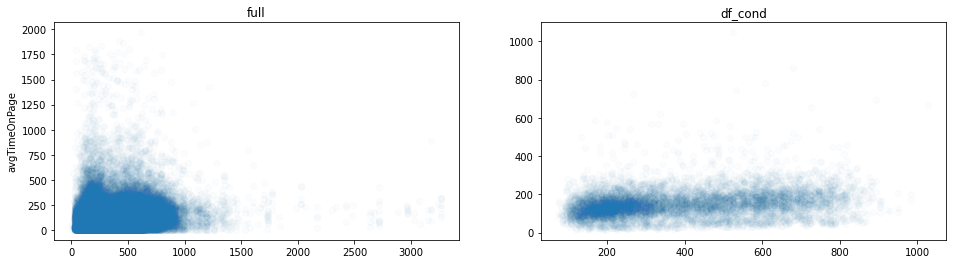

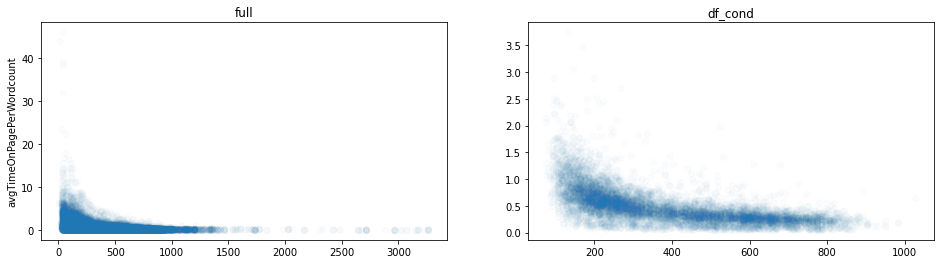

In [182]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize= (16, 4))
ax1.scatter(full.wordcount, full.avgTimeOnPage, alpha=0.02)
ax1.set_title('full')
ax1.set(ylabel='avgTimeOnPage')

ax2.scatter(df.wordcount, df.avgTimeOnPage, alpha=0.02)
ax2.set_title('df_cond')

fig, (ax1, ax2) = plt.subplots(1, 2, figsize= (16, 4))
ax1.scatter(full.wordcount, full.avgTimeOnPagePerWordcount, alpha=0.02)
ax1.set_title('full')
ax1.set(ylabel='avgTimeOnPagePerWordcount')

ax2.scatter(df.wordcount, df.avgTimeOnPagePerWordcount, alpha=0.02)
ax2.set_title('df_cond')

plt.show()

In [186]:
min_diff.sort_values('avgTimeOnPage', ascending=False)

,pageviews,entrances,exits,bounces,timeOnPage,conversions,avgTimeOnPage,stickiness,entranceRate,bounceRate,sharePageviews,n,nObs,score_pageviews,score_avgTimeOnPage,score_entranceRate,score_stickiness,SCORE,kategorie,rubrik,subRubrik,titel,pagePath,dpaGuid,zeilen,prozentDpa,prozentVerlag,categoryCode,creationDate,flextags,genre,geoArea,importance,keywords,lifetime,limbic,links,picture,service,subject,subjectBroader,subjectCode,teaser,text,titelH1,titelH3,urgency,wikidata,wordcount,category,ratgeber,format,dateLoaded,nLoadAttempts,ausreisser,publisher,city,text_preprocessed,nr_tokens,mean_token_length,nr_tokens_teaser,nr_tokens_titelH1,nr_char,nr_sentences,mean_sentence_length,avgTimeOnPagePerWordcount,avgTimeOnPagePerRow,tokensPerMinute,avgTimeOnPagePerNr_char,pageviews-exits,tokensPerSecond,wordsPerRow
articleId,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2119087,1347,1244,1247,459,163326,NaN,1633.260000,7.423905,92.353378,34.075724,100,1,568,31,20,20,5,76,deutschland-und-welt,vermischtes,NaN,geschaeft-mit-drogen-keine-knappheit-wegen-corona,https://www.noz.de/deutschland-und-welt/vermis...,200907-99-466291,82,100,80,dpacat:vm,2020-09-08 12:23:53,NaN,Zusammenfassung,Deutschland,NaN,Drogen,NaN,NaN,Antwort der Bundesregierung auf Kleine Anfrage...,NaN,"dpasrv:edi__,__dpasrv:erd__,__dpasrv:edt__,__d...",Kriminalität,"Justiz, Kriminalität",medtop:20000082,Vieles war in den vergangenen Monaten anders: ...,Berlin (dpa) - Seit neun Jahren steigt in Deut...,Anstieg der Delikte im Drogengeschäft - Keine ...,NaN,3,NaN,646,vm,0,NewsML-G2,2020-09-09 03:33:22,1,nein,NOZ,Berlin,Seit neun Jahren steigt in Deutschland die Zah...,651,6.324117,32,9,4845,37.0,17.594595,2.528266,19.917805,23.731678,0.337102,100,0.395528,7.878049
2091240,387,329,327,102,62863,NaN,1047.716667,15.503876,85.012920,26.356589,100,1,205,17,20,19,9,65,deutschland-und-welt,politik,NaN,ehemaliger-kz-wachmann-bittet-opfer-um-entschu...,https://www.noz.de/deutschland-und-welt/politi...,200720-99-860025,60,100,74,dpacat:pl,2020-07-20 16:23:25,NaN,Zusammenfassung,Deutschland,NaN,NaN,NaN,NaN,Mitteilung der Staatsanwaltschaft vom 18.4.201...,NaN,"dpasrv:bid__,__dpasrv:bdt","Prozess (Gericht)__,__Geschichte","Gericht__,__Sozialwissenschaften","medtop:20000111__,__medtop:20000747",Als «Hölle des Wahnsinns» bezeichnet ein ehema...,Hamburg (dpa) - Im Hamburger Prozess gegen ein...,Ehemaliger KZ-Wachmann bittet Opfer von Stutth...,NaN,3,NaN,524,pl,0,NewsML-G2,2020-08-19 13:20:04,1,nein,NOZ,Hamburg,Im Hamburger Prozess gegen einen ehemaligen Wa...,526,5.901141,35,8,3689,31.0,16.967742,1.999459,17.461944,30.008113,0.284011,60,0.500135,8.733333
2088431,476,412,418,143,49833,NaN,859.189655,12.184874,86.554622,30.042017,100,1,182,19,20,19,8,66,deutschland-und-welt,wirtschaft,NaN,sorgt-corona-fuer-nachsicht-beim-finanzamt,https://www.noz.de/deutschland-und-welt/wirtsc...,200715-99-797687,80,100,82,dpacat:pl,2020-07-15 15:24:07,NaN,Zusammenfassung,Deutschland,NaN,"Corona__,__Covid-19",NaN,NaN,"Interview Steuergewerkschaft__,__FAQ Finanzmin...",NaN,"dpasrv:bdt__,__dpasrv:bid","Steuern__,__Finanzen","Staatshaushalt und Steuern__,__Regierungspolit...","medtop:20000620__,__dpasubject:95",Grüne Wochen beim Finanzamt? So mancher Arbeit...,Berlin (dpa) - Viele Bürger haben ihre Steuere...,Sorgt Corona für Nachsicht beim Finanzamt? - D...,NaN,3,NaN,679,pl,0,NewsML-G2,2020-08-19 13:20:04,1,nein,NOZ,Berlin,Viele Bürger haben ihre Steuererklärung in die...,690,5.917391,37,9,4859,40.0,17.250000,1.265375,10.739871,47.416772,0.176824,58,0.790280,8.487500
2016794,553,486,468,154,66545,NaN,782.882353,15.370705,87.884268,27.848101,100,1,125,21,20,19,9,69,deutschland-und-welt,wirtschaft,NaN,tui-unterbricht-grossteil-des-reisebetriebs,https://www.noz.de/deutschland-und-welt/wirtsc...,200316-99-343394,68,100,83,dpacat:wi,2020-03-16 11:33:48,NaN,Zusammenfassung,"Deutschland__,__International",NaN,"Tui__,__Covid-19",NaN,NaN,NaN,NaN,"dpasrv:wap-nsb__,__dpasrv:nsb__,__dpasrv:edi__...",

In [187]:
ID2 = 2119087
show_ID(df = full, c_list = c_list, ID = ID2)

text: Berlin (dpa) - Seit neun Jahren steigt in Deutschland die Zahl der
Rauschgiftdelikte, die der Polizei bekannt werden. Das
Bundeskriminalamt (BKA) geht davon aus, dass dies nicht nur das
Ergebnis erfolgreicher Fahndung ist. Vielmehr sieht die Behörde in
dem Anstieg auch einen Hinweis darauf, dass hierzulande mehr illegale
Drogen konsumiert werden. Denn das Kontrollniveau war 2019 laut
BKA-Chef Holger Münch etwa so hoch wie im Jahr zuvor.

Der mit Abstand größte Anstieg (plus 12,2 Prozent) wurde 2019 bei
Delikten im Zusammenhang mit Kokain verzeichnet. «Wir stellen fest,
dass es keine Elite-Droge mehr ist», erklärte Münch am Dienstag in
Berlin bei der Vorstellung des aktuellen Lagebildes zur
Drogenkriminalität. Auch junge Menschen griffen vermehrt zu Kokain.

Einen leichten Rückgang gab es dagegen im Handel mit Crystal Meth.
Die Drogenbeauftragte der Bundesregierung, Daniela Ludwig (CSU),
sieht darin auch das Ergebnis erfolgreicher Präventionsarbeit.
Beispielsweise habe man 2015 be